# Abstract
Fraud detection is a critical aspect of financial security in today's technologically advanced world. This assignment delves into the realm of data science to develop models for predicting fraudulent credit card transactions. The dataset used for this task spans from January 1, 2019, to December 31, 2020, containing a mix of legitimate and fraudulent transactions from a diverse set of customers and merchants.

The focus of this assignment is on supervised learning, specifically discrete variable prediction, employing various machine learning algorithms. The chosen models include Logistic Regression, Support Vector Machine (SVM), K-nearest neighbor (KNN), Decision Tree, Random Forest, and Naive Bayes classifiers. The goal is to build models that accurately classify transactions as either fraudulent or legitimate.

The dataset will undergo preprocessing steps such as feature engineering and selection before training the models. The performance of each model will be assessed on both the training and test sets, with metrics such as accuracy, AUC curve, confusion matrix, F1 score, and decision boundary being reported. A critical aspect of this assignment is the implementation of a sklearn-based pipeline to ensure reproducibility and scalability.

# Introduction
Fraudulent activities in credit card transactions pose significant threats to financial institutions and their customers. As fraudsters evolve their tactics, traditional methods of detection become less effective, necessitating advanced data science approaches. This assignment focuses on leveraging machine learning algorithms to create robust fraud detection models.

The dataset used for this task originates from a simulated credit card transaction environment spanning two years. It includes diverse transaction profiles, encompassing various customers, merchants, and transaction categories. The goal is to predict whether a given transaction is fraudulent or not.

The chosen machine learning models cover a spectrum of algorithms, each with its unique strengths in handling classification tasks. Logistic Regression, Support Vector Machine, K-nearest neighbor, Decision Tree, Random Forest, and Naive Bayes classifiers will be employed and evaluated comprehensively.

Preprocessing steps are crucial to enhance the model's predictive capabilities. Feature engineering and selection will be applied to extract relevant information and optimize model performance. The assessment of model accuracy on both training and test sets will provide insights into their generalization capabilities.

The implementation of a sklearn-based pipeline ensures a systematic and reproducible approach to model development. The assignment not only aims for accurate predictions but also emphasizes the importance of understanding model behavior through visualization and interpretation metrics. The subsequent sections will delve into the methodology, results, and discussions, shedding light on the efficacy of each classification algorithm in tackling credit card fraud detection.

## Initialization

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

import plotly.express as px

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the datasets
train_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
test_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

In [3]:
# Display basic information about the datasets
print("Train Data Info:")
print(train_data.info())
print("\nTest Data Info:")
print(test_data.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  l

### Train Data Information:
The training dataset contains a total of 1,296,675 entries and 23 columns. Here is an overview of the data types and non-null counts for each column:

1. **Data Types:**
   - Integer64: 6 columns
   - Float64: 5 columns
   - Object (String): 12 columns

2. **Key Columns:**
   - `Unnamed: 0`: Index column with integer values.
   - `trans_date_trans_time`: Transaction date and time represented as an object.
   - `cc_num`: Credit card number represented as an integer.
   - `merchant`: Merchant name represented as a string.
   - `amt`: Amount of transaction represented as a float.
   - `is_fraud`: Binary indicator for fraud, represented as an integer.

3. **Memory Usage:**
   - The dataset consumes approximately 227.5 MB of memory.

## Test Data Information:
The test dataset comprises 555,719 entries and shares the same structure with the training dataset, containing 23 columns. Here is a summary of the data types and non-null counts:

1. **Data Types:**
   - Integer64: 6 columns
   - Float64: 5 columns
   - Object (String): 12 columns

2. **Key Columns:**
   - `Unnamed: 0`: Index column with integer values.
   - `trans_date_trans_time`: Transaction date and time represented as an object.
   - `cc_num`: Credit card number represented as an integer.
   - `merchant`: Merchant name represented as a string.
   - `amt`: Amount of transaction represented as a float.
   - `is_fraud`: Binary indicator for fraud, represented as an integer.


In [4]:
# Check for missing values in both datasets
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())


Missing Values in Train Data:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Missing Values in Test Data:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state   

It seems that there are no missing values in both the training and test datasets. This is great news, as having complete data ensures a solid foundation for building and training machine learning models.

### Data imbalance check

In [5]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

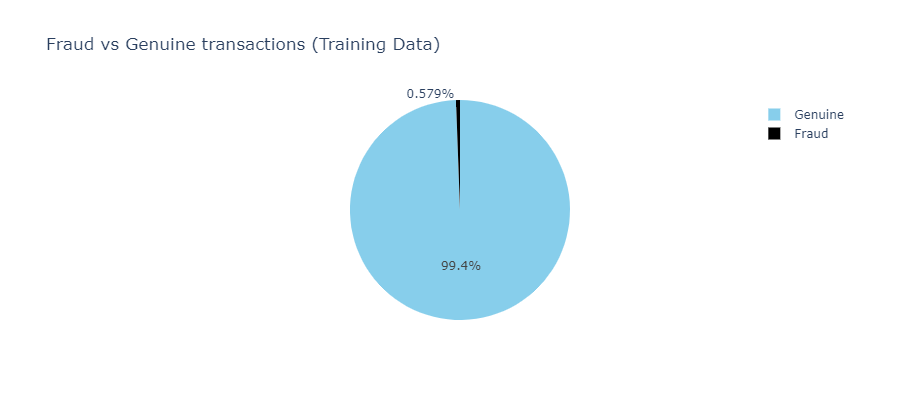

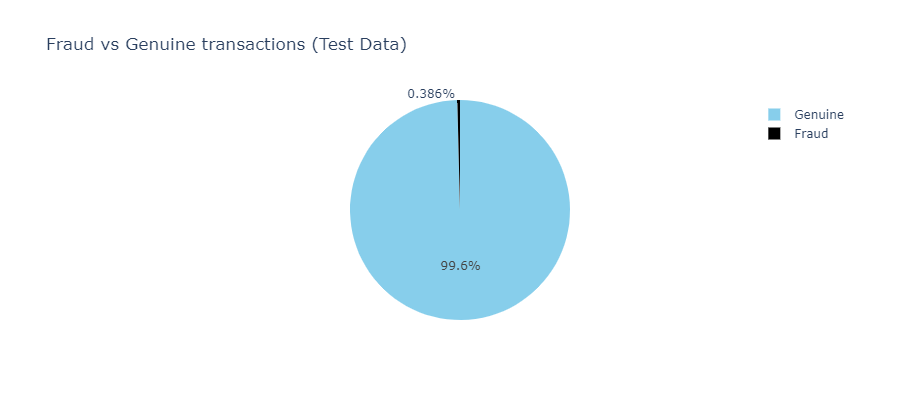

In [6]:
# Mapping labels for better readability
labels = ["Genuine", "Fraud"]

# Counting the occurrences of each class
fraud_or_not_train = train_data["is_fraud"].value_counts().tolist()
fraud_or_not_test = test_data["is_fraud"].value_counts().tolist()

# Creating values list for pie chart
values_train = [fraud_or_not_train[0], fraud_or_not_train[1]]
values_test = [fraud_or_not_test[0], fraud_or_not_test[1]]

# Plotting pie charts for training and test datasets
fig_train = px.pie(values=values_train, names=labels, width=700, height=400, color_discrete_sequence=["skyblue", "black"],
                   title="Fraud vs Genuine transactions (Training Data)")
fig_train.show()

fig_test = px.pie(values=values_test, names=labels, width=700, height=400, color_discrete_sequence=["skyblue", "black"],
                  title="Fraud vs Genuine transactions (Test Data)")
fig_test.show()

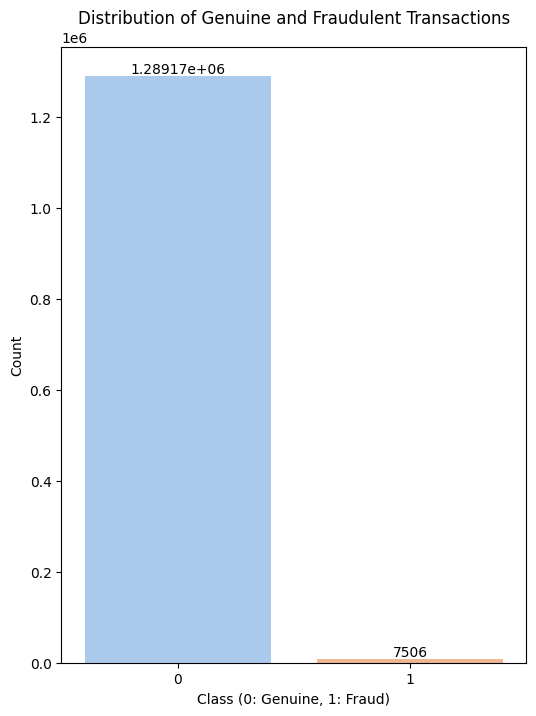

In [7]:
plt.figure(figsize=(6, 8))
ax = sns.countplot(x='is_fraud', data=train_data, palette="pastel")
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, color='black')

plt.title('Distribution of Genuine and Fraudulent Transactions')
plt.xlabel('Class (0: Genuine, 1: Fraud)')
plt.ylabel('Count')
plt.show()

In [8]:
print('Genuine:', round(train_data['is_fraud'].value_counts()[0] / len(train_data) * 100, 2), '% of the dataset')
print('Frauds:', round(train_data['is_fraud'].value_counts()[1] / len(train_data) * 100, 2), '% of the dataset')

Genuine: 99.42 % of the dataset
Frauds: 0.58 % of the dataset


1. **Training Set Fraud Percentage (0.579%):**
   - In the training dataset, the fraud class constitutes an extremely small percentage, approximately 0.579%.
   - This indicates an exceptionally imbalanced class distribution, where instances of fraud are exceedingly rare compared to non-fraudulent transactions.

2. **Test Set Fraud Percentage (0.386%):**
   - In the test dataset, the percentage of transactions labeled as fraud is even smaller, at approximately 0.386%.
   - The test set exhibits an even lower frequency of fraud instances compared to the training set.

**Interpretation:**
- The minuscule percentages underscore the rarity of fraud instances in both the training and test sets.
- The severe class imbalance highlights the need for specialized evaluation metrics and model tuning.

**Recommendations:**
- Given the extremely low percentage of fraud instances, careful consideration of evaluation metrics like precision, recall, F1-score, and ROC-AUC is essential.
- Experiment with various techniques to address class imbalance during model training, such as oversampling, undersampling, or adjusting class weights.
- Fine-tune the model parameters and features, taking into account the challenges posed by the highly imbalanced nature of the data.

### Caution in Using Accuracy Score for Imbalanced Datasets:

Using accuracy score as a metric for evaluating model performance in imbalanced datasets is not recommended. In our dataset, there is a substantial class imbalance, with 99.42% of transactions labeled as Genuine and only 0.579% (7,506) labeled as fraud. If we were to blindly guess the majority class (Genuine), we would achieve an accuracy of 99.42%. However, relying solely on accuracy can be misleading in such imbalanced scenarios.


## Exploratory Data Analysis (EDA)

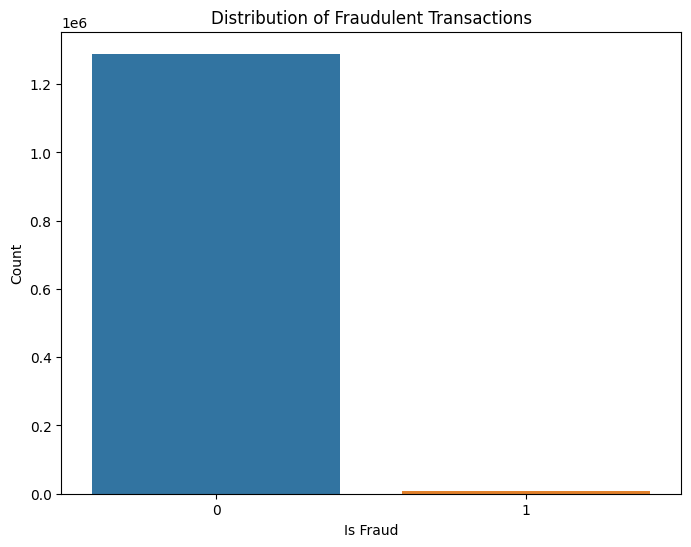

In [9]:
# Visualize the distribution of the target variable (fraudulent or not)
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=train_data)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

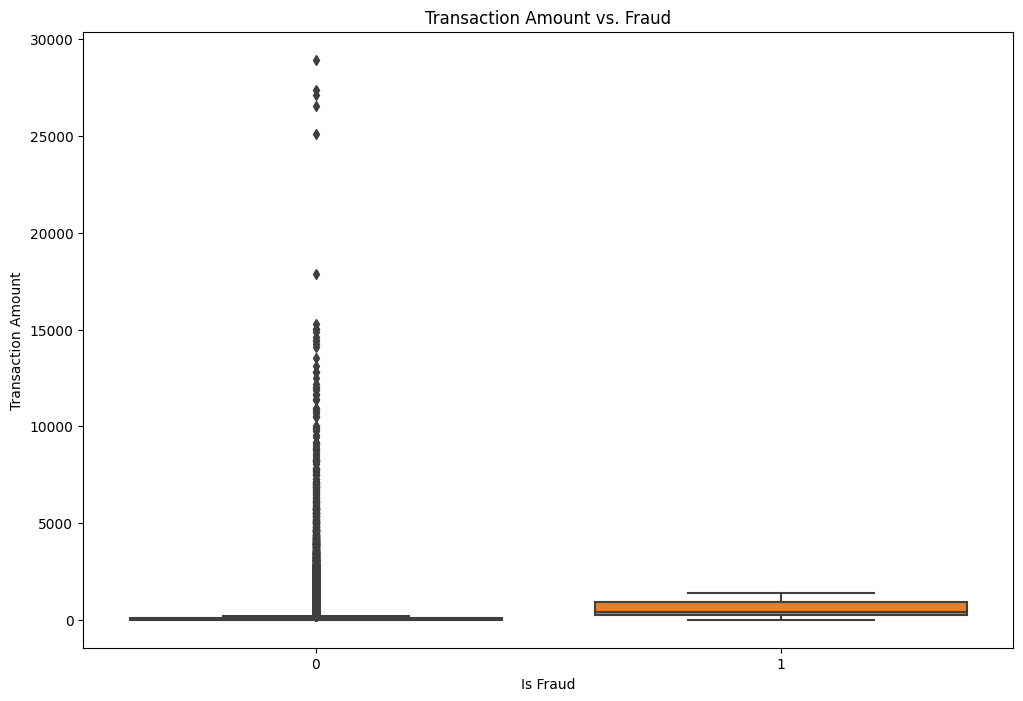

In [10]:
# Explore the distribution of transaction amounts by fraud status
plt.figure(figsize=(12, 8))
sns.boxplot(x='is_fraud', y='amt', data=train_data)
plt.title('Transaction Amount vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

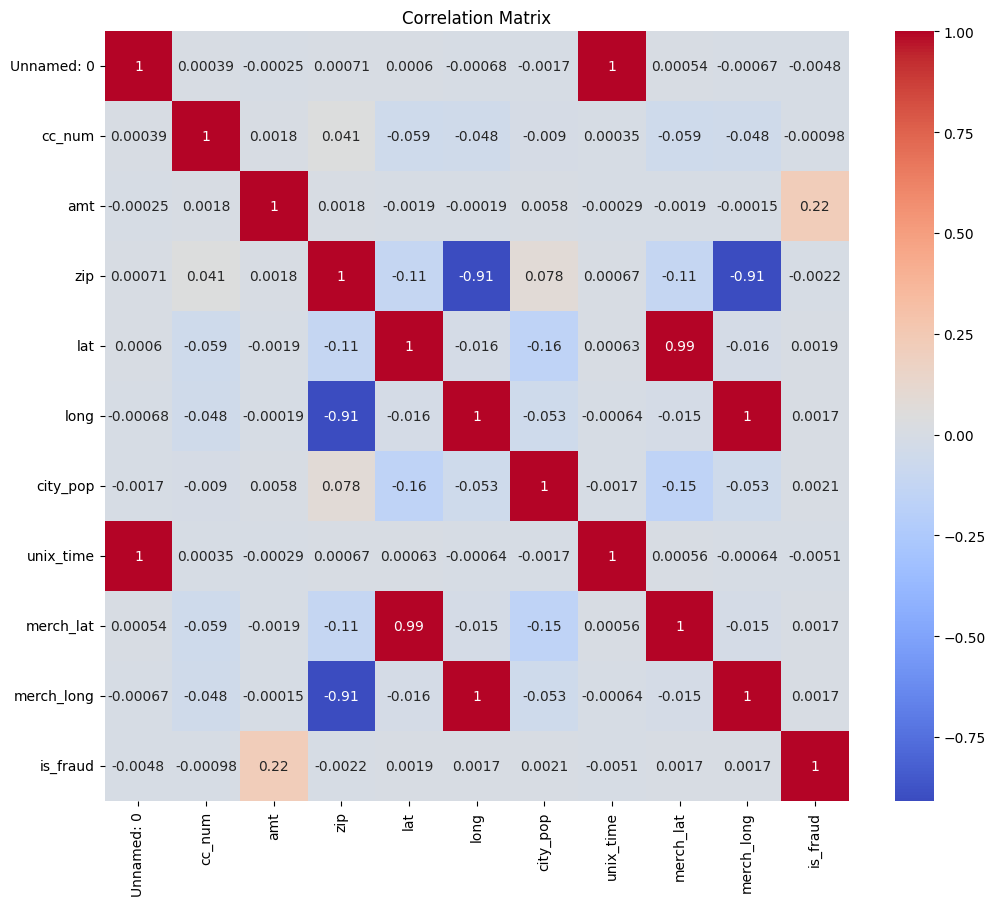

In [11]:
# Exclude non-numeric columns from the correlation matrix
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = train_data[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

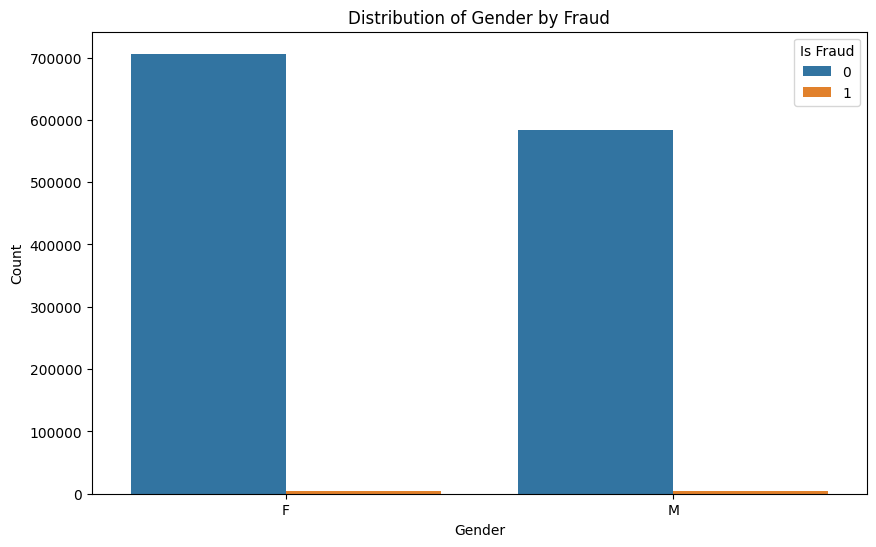

In [12]:
# Explore categorical features (e.g., gender)
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='is_fraud', data=train_data)
plt.title('Distribution of Gender by Fraud')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

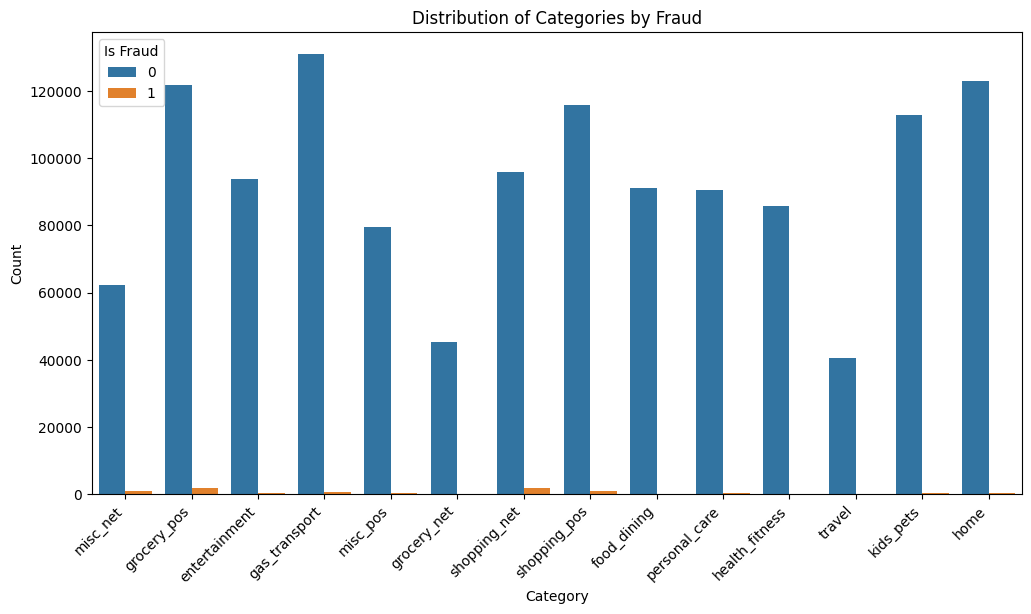

In [13]:
# Explore categorical features (e.g., category)
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=train_data)
plt.title('Distribution of Categories by Fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud')
plt.show()

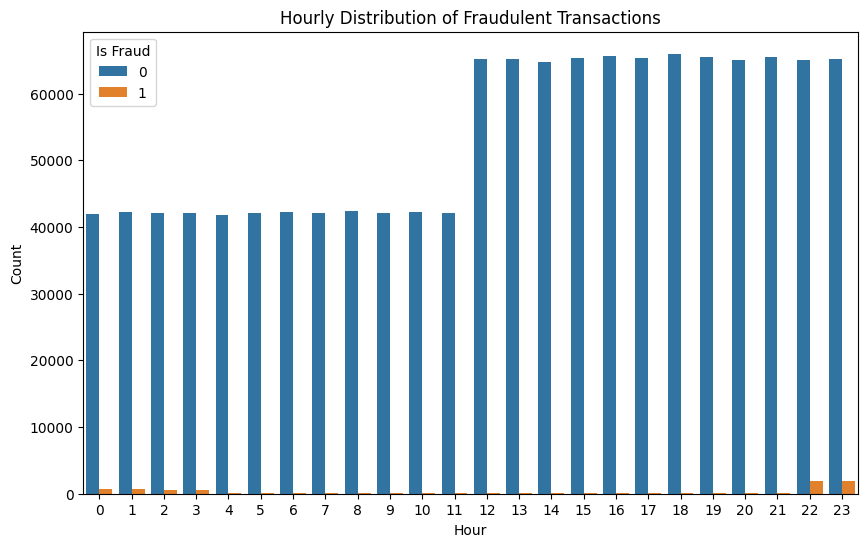

In [14]:
# Time analysis: Extract hours and days from 'trans_date_trans_time'
train_data['trans_hour'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.hour
train_data['trans_day'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.dayofweek

# Plot hourly distribution of fraud
plt.figure(figsize=(10, 6))
sns.countplot(x='trans_hour', hue='is_fraud', data=train_data)
plt.title('Hourly Distribution of Fraudulent Transactions')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

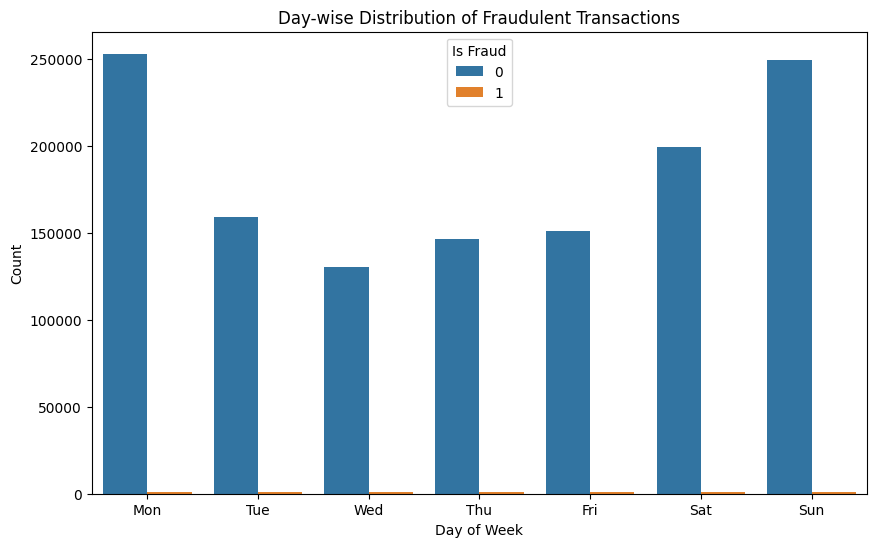

In [15]:
# Plot day-wise distribution of fraud
plt.figure(figsize=(10, 6))
sns.countplot(x='trans_day', hue='is_fraud', data=train_data)
plt.title('Day-wise Distribution of Fraudulent Transactions')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Is Fraud')
plt.show()

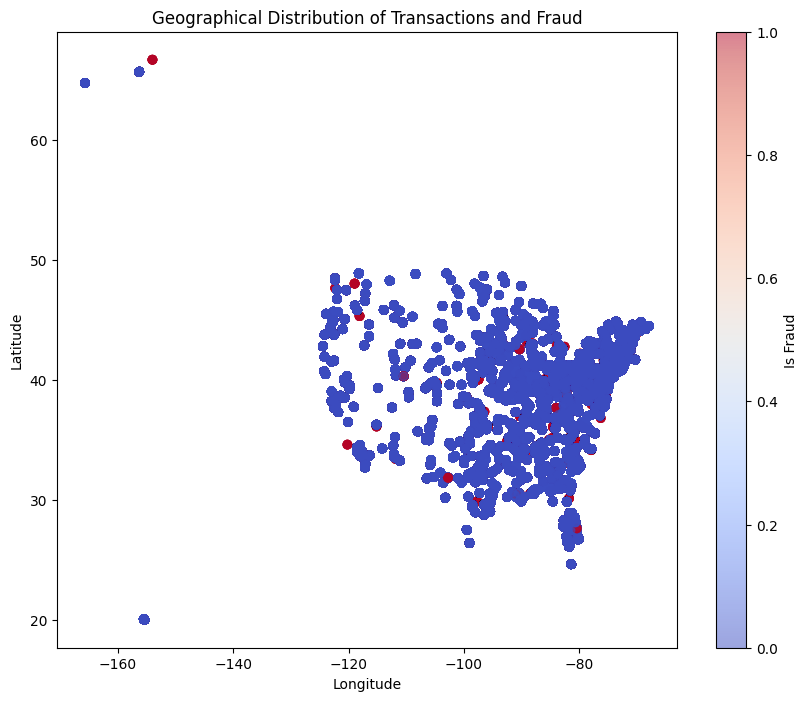

In [16]:
# Scatter plot of geographical data
plt.figure(figsize=(10, 8))
plt.scatter(train_data['long'], train_data['lat'], c=train_data['is_fraud'], cmap='coolwarm', alpha=0.5)
plt.title('Geographical Distribution of Transactions and Fraud')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Is Fraud')
plt.show()

<Figure size 1000x600 with 0 Axes>

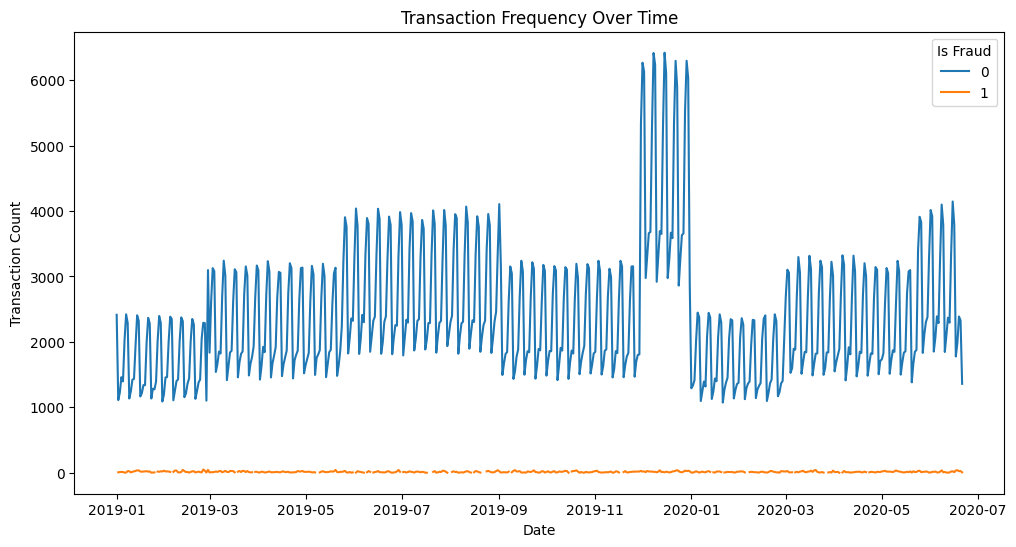

In [17]:
# Transaction Frequency Analysis
plt.figure(figsize=(10, 6))
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['trans_date'] = train_data['trans_date_trans_time'].dt.date
transaction_counts = train_data.groupby(['trans_date', 'is_fraud']).size().unstack()
transaction_counts.plot(kind='line', figsize=(12, 6))
plt.title('Transaction Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud')
plt.show()

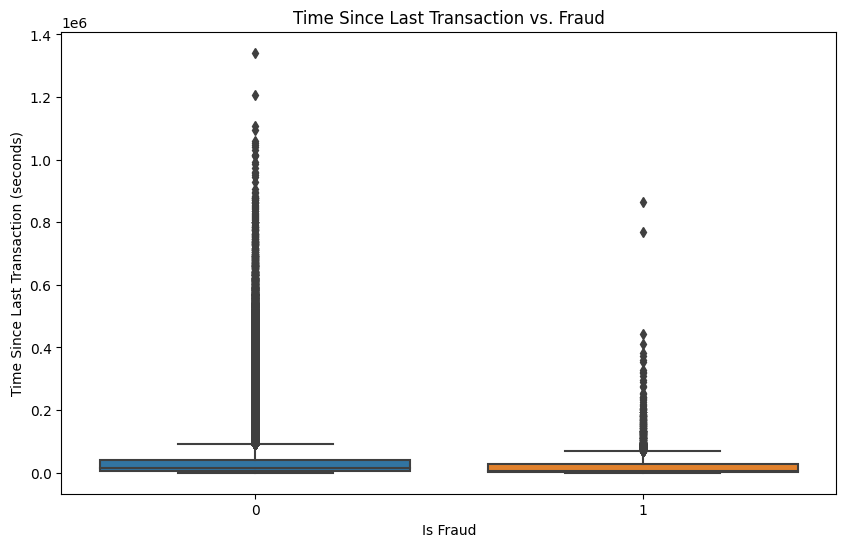

In [18]:
# Transaction Velocity Analysis
train_data['time_since_last_transaction'] = train_data.groupby('cc_num')['unix_time'].diff()
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='time_since_last_transaction', data=train_data)
plt.title('Time Since Last Transaction vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Time Since Last Transaction (seconds)')
plt.show()

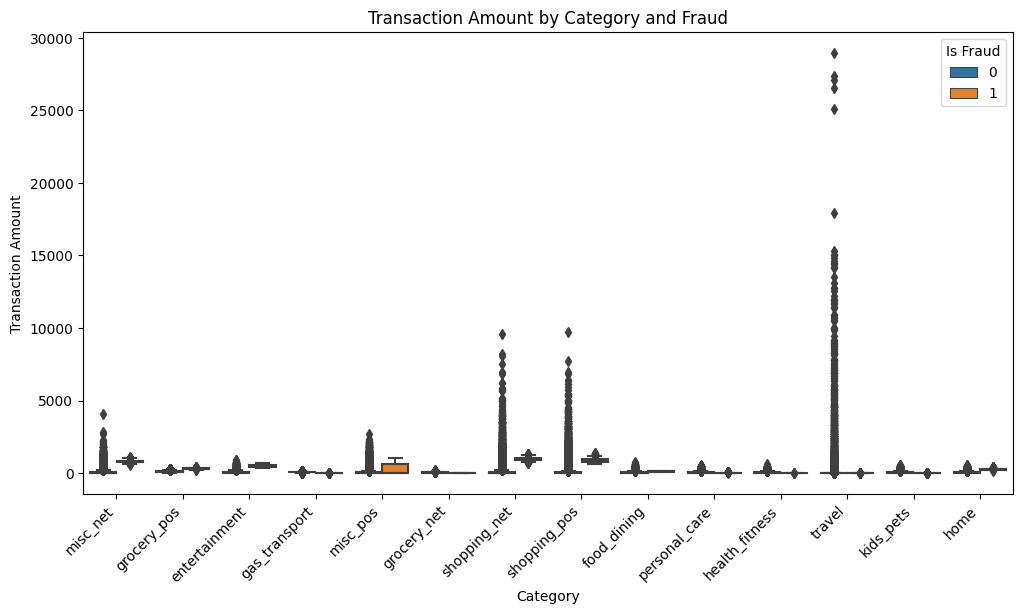

In [19]:
# Transaction Amount by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='amt', hue='is_fraud', data=train_data)
plt.title('Transaction Amount by Category and Fraud')
plt.xlabel('Category')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud')
plt.show()

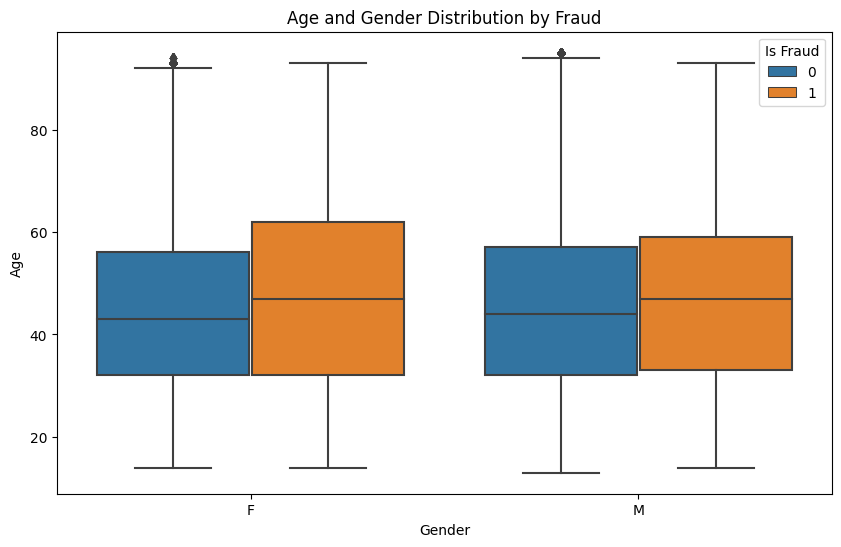

In [20]:
# Age and Gender Analysis
train_data['dob'] = pd.to_datetime(train_data['dob'])
train_data['age'] = (train_data['trans_date_trans_time'] - train_data['dob']).dt.days // 365
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', hue='is_fraud', data=train_data)
plt.title('Age and Gender Distribution by Fraud')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Is Fraud')
plt.show()

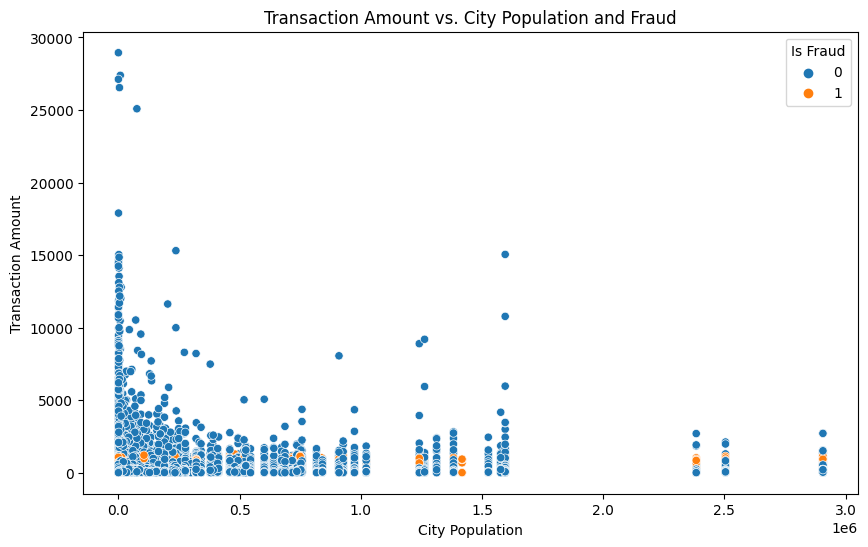

In [21]:
# Transaction Amount vs. City Population
plt.figure(figsize=(10, 6))
sns.scatterplot(x='city_pop', y='amt', hue='is_fraud', data=train_data)
plt.title('Transaction Amount vs. City Population and Fraud')
plt.xlabel('City Population')
plt.ylabel('Transaction Amount')
plt.legend(title='Is Fraud')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



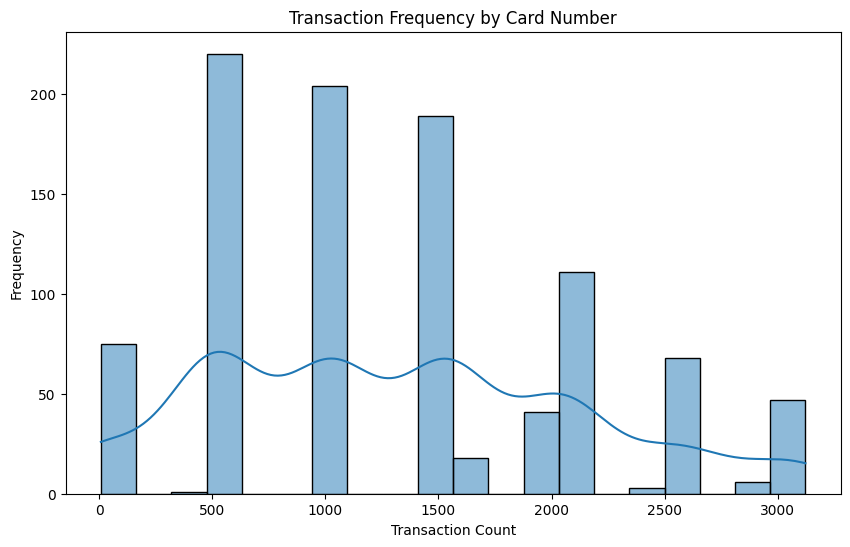

In [22]:
# Transaction Frequency by Card Number
card_transaction_counts = train_data['cc_num'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(card_transaction_counts, bins=20, kde=True)
plt.title('Transaction Frequency by Card Number')
plt.xlabel('Transaction Count')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



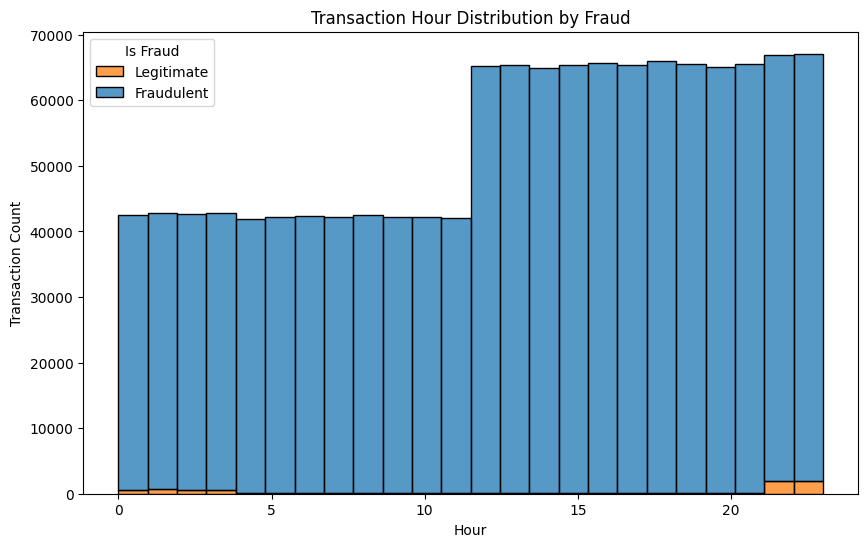

In [23]:
# Transaction Time and Fraud Correlation
train_data['trans_hour'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.hour
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='trans_hour', hue='is_fraud', multiple='stack', bins=24)
plt.title('Transaction Hour Distribution by Fraud')
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud', labels=['Legitimate', 'Fraudulent'])  # Specify legend labels
plt.show()

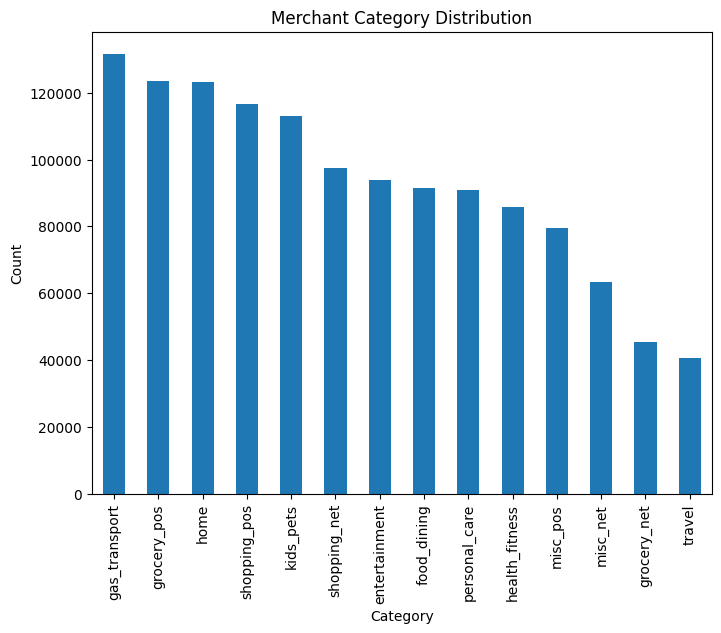

In [24]:
# Merchant Category Distribution
plt.figure(figsize=(8, 6))
train_data['category'].value_counts().plot(kind='bar')
plt.title('Merchant Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


## Data pre-processing

In [25]:
# Drop duplicates
train_data.drop_duplicates(inplace=True)
print("Duplicated values have been successfully dropped.")
print("*" * 100)

Duplicated values have been successfully dropped.
****************************************************************************************************


In [26]:
# Check and handle null values
null_values = train_data.isnull().sum()
print("Missing Values:")
print(null_values)

Missing Values:
Unnamed: 0                       0
trans_date_trans_time            0
cc_num                           0
merchant                         0
category                         0
amt                              0
first                            0
last                             0
gender                           0
street                           0
city                             0
state                            0
zip                              0
lat                              0
long                             0
city_pop                         0
job                              0
dob                              0
trans_num                        0
unix_time                        0
merch_lat                        0
merch_long                       0
is_fraud                         0
trans_hour                       0
trans_day                        0
trans_date                       0
time_since_last_transaction    983
age                              0
dtyp

In [27]:
# Assuming you want to drop columns with high null values
train_data = train_data.dropna(axis=1)
print("Columns with high null values dropped.")
print("*" * 100)

Columns with high null values dropped.
****************************************************************************************************


In [28]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day,trans_date,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1,2019-01-01,30
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,2019-01-01,40
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1,2019-01-01,56
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1,2019-01-01,52
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1,2019-01-01,32


In [29]:
train_data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
trans_hour               0
trans_day                0
trans_date               0
age                      0
dtype: int64

In [30]:
# Create new features based on transaction amount ranges
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, np.inf]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000+']
train_data['amt_range'] = pd.cut(train_data['amt'], bins=bins, labels=labels)

In [31]:
# Extract information from 'trans_date_trans_time'
train_data['hour'] = train_data['trans_date_trans_time'].dt.hour
train_data['weekday'] = train_data['trans_date_trans_time'].dt.weekday
train_data['day'] = train_data['trans_date_trans_time'].dt.day
train_data['month'] = train_data['trans_date_trans_time'].dt.month
train_data['year'] = train_data['trans_date_trans_time'].dt.year

In [32]:
# Assuming 'dob' is the date of birth, create an 'age' feature
train_data['dob'] = pd.to_datetime(train_data['dob'])
train_data['age'] = (train_data['trans_date_trans_time'].dt.year - train_data['dob'].dt.year).astype(int)

In [33]:
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,trans_hour,trans_day,trans_date,age,amt_range,hour,weekday,day,month,year
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0,1,2019-01-01,31,0-500,0,1,1,1,2019
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,0,1,2019-01-01,41,0-500,0,1,1,1,2019
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,0,1,2019-01-01,57,0-500,0,1,1,1,2019
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,0,1,2019-01-01,52,0-500,0,1,1,1,2019
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,0,1,2019-01-01,33,0-500,0,1,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,12,6,2020-06-21,59,0-500,12,6,21,6,2020
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,12,6,2020-06-21,41,0-500,12,6,21,6,2020
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,12,6,2020-06-21,53,0-500,12,6,21,6,2020
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,12,6,2020-06-21,40,0-500,12,6,21,6,2020


In [34]:
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,trans_hour,trans_day,trans_date,age,amt_range,hour,weekday,day,month,year
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0,1,2019-01-01,31,0-500,0,1,1,1,2019
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,0,1,2019-01-01,41,0-500,0,1,1,1,2019
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,0,1,2019-01-01,57,0-500,0,1,1,1,2019
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,0,1,2019-01-01,52,0-500,0,1,1,1,2019
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,0,1,2019-01-01,33,0-500,0,1,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,12,6,2020-06-21,59,0-500,12,6,21,6,2020
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,12,6,2020-06-21,41,0-500,12,6,21,6,2020
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,12,6,2020-06-21,53,0-500,12,6,21,6,2020
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,12,6,2020-06-21,40,0-500,12,6,21,6,2020


In [35]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num', 'trans_date', 'merchant']
train_data.drop(columns=columns_to_drop, inplace=True)
print("Unnecessary columns dropped.")
print("*" * 100)

Unnecessary columns dropped.
****************************************************************************************************


In [36]:
# Encode categorical variables (assuming you have columns like 'merchant', 'category', 'gender', etc.)
train_data = pd.get_dummies(train_data, columns=['category', 'gender', 'amt_range'], drop_first=True)

In [46]:
for column in train_data.columns:
    if train_data[column].dtype not in ['float64', 'int64', 'bool']:
        print(f"Column: {column}, Type: {train_data[column].dtype}")

Column: trans_hour, Type: int32
Column: trans_day, Type: int32
Column: hour, Type: int32
Column: weekday, Type: int32
Column: day, Type: int32
Column: month, Type: int32
Column: year, Type: int32


In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [48]:
# Assuming 'is_fraud' is the target variable
X = train_data.drop('is_fraud', axis=1)
y = train_data['is_fraud']

In [49]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
# Apply PCA with 20 components
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)

In [51]:
# Create a new DataFrame with the PCA components and the target variable
columns_pca = [f'pca_{i+1}' for i in range(20)]
df_pca = pd.DataFrame(X_pca, columns=columns_pca)
df_pca['is_fraud'] = y

# Display the new DataFrame with PCA components
print(df_pca.head())

      pca_1     pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
0  2.568747 -0.766600  1.015195 -0.749454 -0.304131 -1.719800 -1.050610   
1  3.174236  3.240299 -0.002704  2.284008  0.300060 -1.749132  0.450378   
2  2.408867  1.750332  0.486313  1.828230  0.567996 -1.703499  0.384901   
3  3.299230  2.760119  0.096738  1.655509 -0.332720 -1.747365  0.843990   
4  2.366448 -0.144718  0.740962 -1.347507 -0.263797 -1.734263 -1.002194   

      pca_8     pca_9    pca_10  ...    pca_12    pca_13    pca_14    pca_15  \
0 -2.353425 -0.770116 -1.079704  ...  0.465870 -0.234700 -0.547711  1.186005   
1 -2.300033  1.766818 -0.074331  ... -1.014883  0.724226 -0.260739 -0.030064   
2 -2.283739  0.073908 -0.324934  ...  0.051923 -0.104547  0.156573 -0.108791   
3 -2.239610 -0.848469  0.553213  ...  1.038736 -0.452591  0.311281 -0.241687   
4 -2.219816  0.735327 -1.089336  ...  0.755421 -0.781112  0.114269  0.879791   

     pca_16    pca_17    pca_18    pca_19    pca_20  is_fraud  
0  0

In [52]:
# # Addressing Outliers with IQR
def remove_outliers_iqr(data, features):
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    return data

In [53]:
train_data = remove_outliers_iqr(df_pca, features=df_pca.columns)

In [54]:
train_data

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,...,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,is_fraud
1,3.174236,3.240299,-0.002704,2.284008,0.300060,-1.749132,0.450378,-2.300033,1.766818,-0.074331,...,-1.014883,0.724226,-0.260739,-0.030064,0.168498,0.009203,-0.434016,0.963729,-0.048639,0
2,2.408867,1.750332,0.486313,1.828230,0.567996,-1.703499,0.384901,-2.283739,0.073908,-0.324934,...,0.051923,-0.104547,0.156573,-0.108791,0.037114,0.136584,-0.039426,-0.139025,0.034779,0
3,3.299230,2.760119,0.096738,1.655509,-0.332720,-1.747365,0.843990,-2.239610,-0.848469,0.553213,...,1.038736,-0.452591,0.311281,-0.241687,-0.008466,0.160840,-0.406729,0.368648,-0.045562,0
5,3.196313,0.379099,0.599087,-1.537834,-0.209181,-1.713403,1.054284,-2.234413,-1.323682,1.195885,...,0.902066,-0.172005,0.039143,0.061327,0.019013,0.014181,-0.089717,0.707771,-0.047861,0
7,3.322871,0.186987,0.707559,-1.321404,-0.326545,-1.698683,1.544634,-2.238253,-1.517855,0.514823,...,0.841275,-0.406356,0.226946,-0.396721,0.033508,0.223572,-0.299558,0.172028,-0.020701,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296661,-0.501929,0.077553,-1.007742,-1.315356,-0.140893,2.812250,0.415451,0.718664,0.756170,-1.566603,...,-0.957955,0.854154,0.787587,0.813667,0.028941,-0.249770,0.035231,0.139746,-0.015326,0
1296663,-0.616933,-0.161352,-0.800210,0.125203,-0.145156,2.824631,0.233538,0.717351,0.671294,-0.992500,...,-0.959655,1.079994,0.593702,1.157586,0.043124,-0.387839,0.247213,0.613022,-0.021098,0
1296664,0.199308,0.736843,-1.275517,-1.915275,-0.042237,2.826636,-0.216752,0.658445,0.047381,0.382429,...,-0.020103,0.154805,-0.121550,0.223068,-0.000766,-0.129911,0.109988,0.361197,-0.009162,0
1296665,-0.422610,1.430692,-1.433388,-1.041658,-0.104943,2.792621,0.270538,0.718021,0.882465,-1.535395,...,-0.936056,0.875024,0.799004,0.864330,0.031668,-0.265523,0.019604,0.189620,-0.024406,0


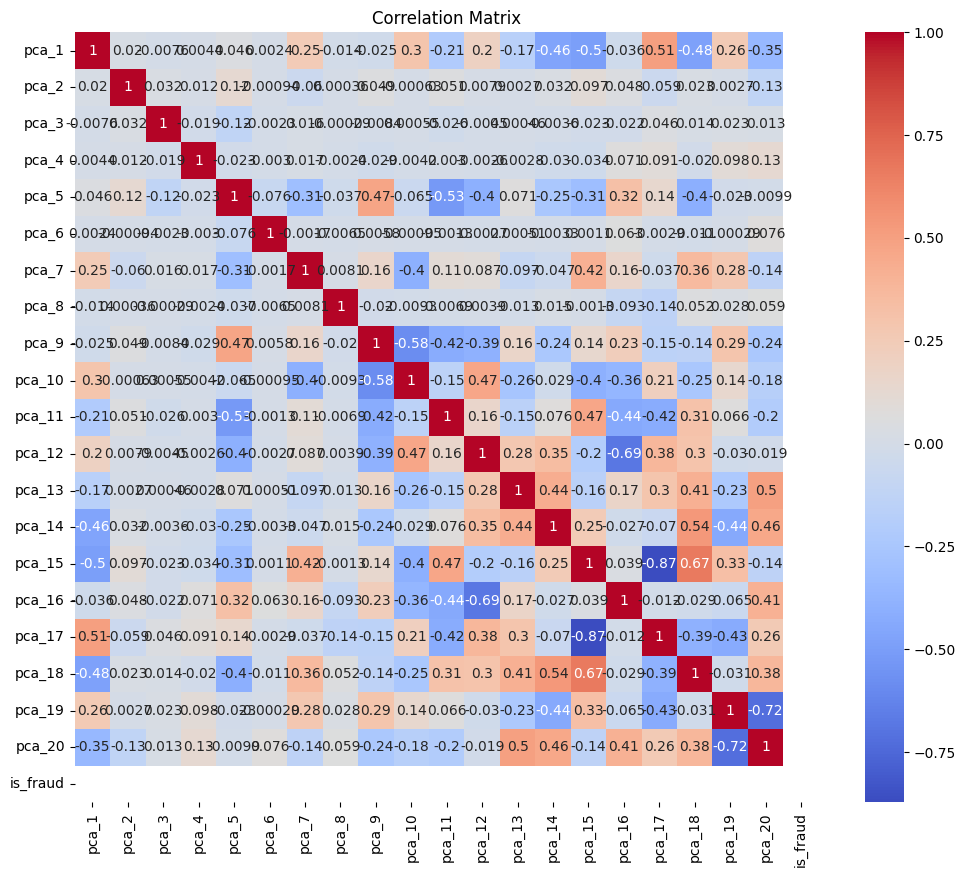

In [55]:
# Explore the correlation between numerical features
corr_matrix = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# Split the data into features (X) and target variable (y)
X = df_pca.drop('is_fraud', axis=1)
y = df_pca['is_fraud']

In [58]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [59]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [60]:
# checking newly created data
print('Current length of the training set: ', len(y_resampled))

Current length of the training set:  2320548


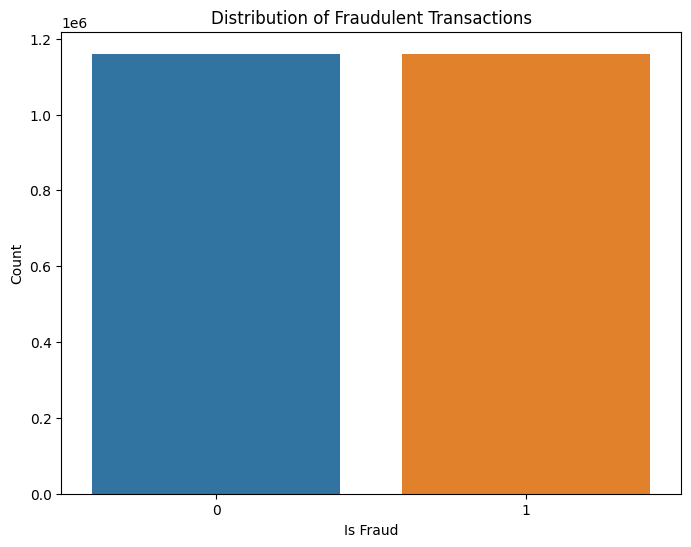

In [61]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

In [62]:
x_train_copy = X_resampled 
y_train_copy = y_resampled

x_train = X_resampled [:100000]
y_train = y_resampled[:100000]

In [63]:
# Train Logistic Regression model
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)

# Make predictions on test data
lg_predictions = lg_model.predict(X_test)

# Calculate evaluation metrics on test data
lg_accuracy = accuracy_score(y_test, lg_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("Logistic Regression Accuracy: {:.3f}%".format(lg_accuracy * 100))

Logistic Regression Accuracy: 99.413%


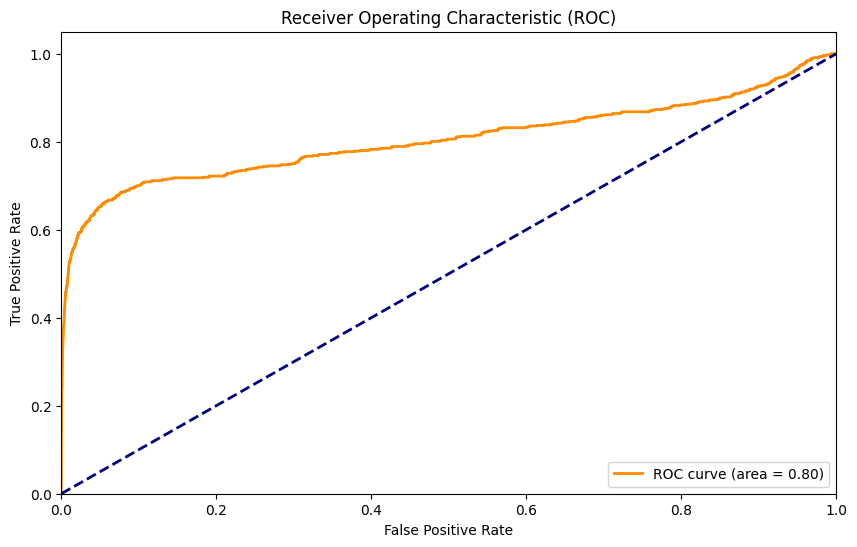

In [64]:
# Calculate ROC curve and AUC
probs = lg_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

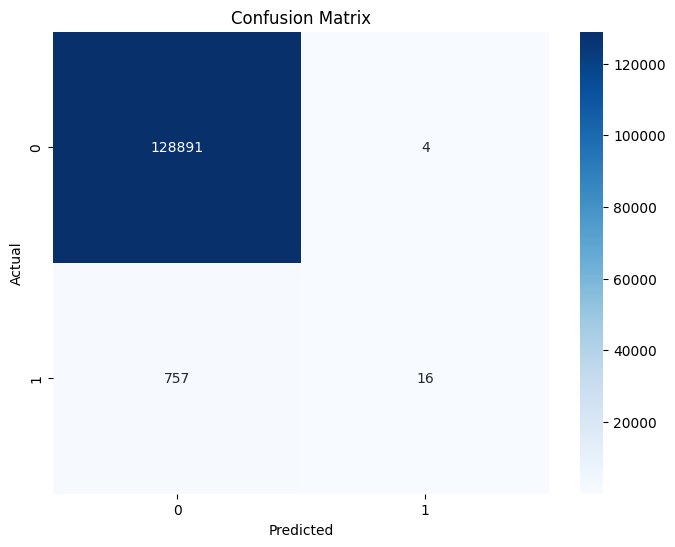

In [65]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, lg_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [66]:
# Train SVM model

svm_model = SVC(kernel='poly')
svm_model.fit(x_train, y_train)

# Make predictions on test data
svm_predictions = svm_model.predict(X_test)

# Calculate evaluation metrics on test data
svm_accuracy = accuracy_score(y_test, svm_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("SVM Accuracy: {:.3f}%".format(svm_accuracy * 100))

KeyboardInterrupt: 

In [ ]:
from sklearn.preprocessing import label_binarize

In [ ]:
# Obtain decision function scores for the test set
decision_scores_svm = svm_model.decision_function(X_test)

# Calculate ROC curve and AUC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, decision_scores_svm)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Train KNN model

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
# Make predictions on test data
knn_predictions = knn_model.predict(X_test)

# Calculate evaluation metrics on test data
knn_accuracy = accuracy_score(y_test, knn_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("KNN Accuracy: {:.3f}%".format(knn_accuracy * 100))

In [ ]:
# Calculate ROC curve and AUC
probs = knn_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, knn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Train Random Forest model

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
# Make predictions on test data
rf_predictions = rf_model.predict(X_test)

# Calculate evaluation metrics on test data
rf_accuracy = accuracy_score(y_test, rf_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("Random Forest Accuracy: {:.3f}%".format(rf_accuracy * 100))

In [ ]:
# Calculate ROC curve and AUC
probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier

# Train SGD model
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(x_train, y_train)
# Make predictions on test data
sgd_predictions = sgd_model.predict(X_test)

# Calculate evaluation metrics on test data
sgd_accuracy = accuracy_score(y_test, sgd_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("SGD Accuracy: {:.3f}%".format(sgd_accuracy * 100))

In [ ]:
# Calculate decision scores for the positive class
decision_scores = sgd_model.decision_function(X_test)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, decision_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, sgd_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Train Extra Trees model
extra_trees_model = ExtraTreesClassifier(random_state=42)
extra_trees_model.fit(x_train, y_train)

# Make predictions on test data
ext_predictions = extra_trees_model.predict(X_test)

# Calculate evaluation metrics on test data
ext_accuracy = accuracy_score(y_test, ext_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("Extra Tree Accuracy: {:.3f}%".format(ext_accuracy * 100))

In [ ]:
# Calculate ROC curve and AUC
probs = extra_trees_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, ext_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

GaussianNB()

In [ ]:
# Train Naive Bayes model
bayes_model = GaussianNB()
bayes_model.fit(x_train, y_train)

# Make predictions on test data
bayes_predictions = bayes_model.predict(X_test)

# Calculate evaluation metrics on test data
bayes_accuracy = accuracy_score(y_test, bayes_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("Extra Tree Accuracy: {:.3f}%".format(bayes_accuracy * 100))

In [ ]:
# Calculate ROC curve and AUC
probs = bayes_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, bayes_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

In [ ]:
# Define model names and instances
model_names = ['Logistic Regression', 'SVM', 'KNN', 'Random Forest', 'SGD', 'Extra Trees', 'Naive Bayes']
model_instances = [lg_model, svm_model, knn_model, rf_model, sgd_model, extra_trees_model, bayes_model]

In [ ]:
# Initialize lists to store accuracy and ROC scores
accuracy_scores = []
roc_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

In [ ]:
# Calculate accuracy and ROC scores for each model
for model in model_instances:
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    roc_score = roc_auc_score(y_test, predictions)
    accuracy_scores.append(accuracy)
    roc_scores.append(roc_score)
    f1_scores.append(f1_score(y_test, predictions))
    precision_scores.append(precision_score(y_test, predictions))
    recall_scores.append(recall_score(y_test, predictions))

In [ ]:
# Create a DataFrame to compare results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'ROC Score': roc_scores,
    'F1 Score': f1_scores,
    'Precision Score': precision_scores,
    'Recall Score': recall_scores,
})

In [ ]:
# Print the comparison table
print(results_df)

In [83]:
from sklearn.utils.class_weight import compute_class_weight

In [85]:
# Assuming y_train contains your class labels (0 and 1)
classes = np.unique(y_train2)
class_weights = dict(zip(classes, compute_class_weight(class_weight='balanced', classes=classes, y=y_train2)))

In [86]:
class_weights

{0: 0.5029111776656126, 1: 86.37589928057554}

In [ ]:
# Use the calculated weights during model training
# Logistic Regression
logistic_model = LogisticRegression(class_weight=class_weights)
logistic_model.fit(x_train, y_train)

In [ ]:
# Support Vector Machine (SVM)
svm_model = SVC(class_weight=class_weights, probability=True)
svm_model.fit(x_train, y_train)

In [ ]:
# K-nearest neighbor (KNN)
knn_model = KNeighborsClassifier(weights='distance')
knn_model.fit(x_train, y_train)

In [ ]:
# Decision Tree
tree_model = DecisionTreeClassifier(class_weight=class_weights)
tree_model.fit(x_train, y_train)

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(class_weight=class_weights)
rf_model.fit(x_train, y_train)

In [ ]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

In [ ]:
# Function to print metrics
def print_metrics(model, X, y_true):
    # Predictions
    y_pred = model.predict(X)
    
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Classification Report
    report = classification_report(y_true, y_pred)
    print("Classification Report:")
    print(report)

    # ROC Curve
    y_scores = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 4))

    # Plot ROC curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

    # Plot Confusion Matrix
    plt.subplot(1, 2, 2)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.tight_layout()
    plt.show()

In [ ]:
# Print metrics for each model
print("Logistic Regression Metrics:")
print_metrics(logistic_model, X_test, y_test)

In [ ]:
print("\nSVM Metrics:")
print_metrics(svm_model, X_test, y_test)

In [ ]:
print("\nKNN Metrics:")
print_metrics(knn_model, X_test, y_test)

In [ ]:
print("\nDecision Tree Metrics:")
print_metrics(tree_model, X_test, y_test)

In [ ]:
print("\nRandom Forest Metrics:")
print_metrics(rf_model, X_test, y_test)

In [ ]:
print("\nNaive Bayes Metrics:")
print_metrics(nb_model, X_test, y_test)

In [67]:
from xgboost import XGBClassifier

In [68]:
xgb_model = XGBClassifier(scale_pos_weight=class_weights[1])

NameError: name 'class_weights' is not defined

In [ ]:
xgb_model.fit(x_train, y_train)

In [ ]:
print("\nRandom Forest Metrics:")
print_metrics(xgb_model, X_test, y_test)

In [38]:
test_df = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

In [39]:
test_df['trans_hour'] = pd.to_datetime(test_df['trans_date_trans_time']).dt.hour
test_df['trans_day'] = pd.to_datetime(test_df['trans_date_trans_time']).dt.dayofweek

test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])
test_df['trans_date'] = test_df['trans_date_trans_time'].dt.date

# test_df['time_since_last_transaction'] = test_df.groupby('cc_num')['unix_time'].diff()

test_df['dob'] = pd.to_datetime(test_df['dob'])
test_df['age'] = (test_df['trans_date_trans_time'] -test_df['dob']).dt.days // 365

test_df['trans_hour'] = pd.to_datetime(test_df['trans_date_trans_time']).dt.hour

In [40]:
test_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day,trans_date,age
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,12,6,2020-06-21,52
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,12,6,2020-06-21,30
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,12,6,2020-06-21,49
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,12,6,2020-06-21,32
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,12,6,2020-06-21,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,23,3,2020-12-31,54
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,23,3,2020-12-31,21
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,23,3,2020-12-31,39
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,23,3,2020-12-31,55


In [41]:
test_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
trans_hour               0
trans_day                0
trans_date               0
age                      0
dtype: int64

In [42]:
test_df.drop_duplicates(inplace=True)
print("Duplicated values have been successfully dropped.")
print("*" * 100)

Duplicated values have been successfully dropped.
****************************************************************************************************


In [43]:
test_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day,trans_date,age
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,12,6,2020-06-21,52
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,12,6,2020-06-21,30
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,12,6,2020-06-21,49
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,12,6,2020-06-21,32
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,12,6,2020-06-21,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,23,3,2020-12-31,54
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,23,3,2020-12-31,21
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,23,3,2020-12-31,39
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,23,3,2020-12-31,55


In [44]:
# Create new features based on transaction amount ranges
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, np.inf]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000+']
test_df['amt_range'] = pd.cut(test_df['amt'], bins=bins, labels=labels)

# Extract information from 'trans_date_trans_time'
test_df['hour'] = test_df['trans_date_trans_time'].dt.hour
test_df['weekday'] = test_df['trans_date_trans_time'].dt.weekday
test_df['day'] = test_df['trans_date_trans_time'].dt.day
test_df['month'] = test_df['trans_date_trans_time'].dt.month
test_df['year'] = test_df['trans_date_trans_time'].dt.year

# Assuming 'dob' is the date of birth, create an 'age' feature
test_df['dob'] = pd.to_datetime(test_df['dob'])
test_df['age'] = (test_df['trans_date_trans_time'].dt.year - test_df['dob'].dt.year).astype(int)

In [45]:
test_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,trans_hour,trans_day,trans_date,age,amt_range,hour,weekday,day,month,year
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,12,6,2020-06-21,52,0-500,12,6,21,6,2020
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,12,6,2020-06-21,30,0-500,12,6,21,6,2020
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,12,6,2020-06-21,50,0-500,12,6,21,6,2020
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,12,6,2020-06-21,33,0-500,12,6,21,6,2020
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,12,6,2020-06-21,65,0-500,12,6,21,6,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,23,3,2020-12-31,54,0-500,23,3,31,12,2020
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,23,3,2020-12-31,21,0-500,23,3,31,12,2020
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,23,3,2020-12-31,39,0-500,23,3,31,12,2020
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,23,3,2020-12-31,55,0-500,23,3,31,12,2020


In [46]:
unnamed_column = test_df['Unnamed: 0']

In [47]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num', 'trans_date', 'merchant']
test_df.drop(columns=columns_to_drop, inplace=True)
print("Unnecessary columns dropped.")
print("*" * 100)

# Encode categorical variables (assuming you have columns like 'merchant', 'category', 'gender', etc.)
test_df = pd.get_dummies(test_df, columns=['category', 'gender', 'amt_range'], drop_first=True)

Unnecessary columns dropped.
****************************************************************************************************


In [48]:
test_df

,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,trans_hour,...,category_shopping_net,category_shopping_pos,category_travel,gender_M,amt_range_500-1000,amt_range_1000-1500,amt_range_1500-2000,amt_range_2000-2500,amt_range_2500-3000,amt_range_3000+
0,2291163933867244,2.86,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0,12,...,False,False,False,True,False,False,False,False,False,False
1,3573030041201292,29.84,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0,12,...,False,False,False,False,False,False,False,False,False,False
2,3598215285024754,41.28,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0,12,...,False,False,False,False,False,False,False,False,False,False
3,3591919803438423,60.05,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0,12,...,False,False,False,True,False,False,False,False,False,False
4,3526826139003047,3.19,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0,12,...,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,43.77,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0,23,...,False,False,False,True,False,False,False,False,False,False
555715,3556613125071656,111.84,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0,23,...,False,False,False,True,False,False,False,False,False,False
555716,6011724471098086,86.88,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0,23,...,False,False,False,False,False,False,False,False,False,False
555717,4079773899158,7.99,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0,23,...,False,False,True,True,False,False,False,False,False,False


In [80]:
# Assuming 'is_fraud' is the target variable
X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test)

# Apply PCA with 20 components
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with the PCA components and the target variable
columns_pca = [f'pca_{i+1}' for i in range(20)]
df_pca = pd.DataFrame(X_pca, columns=columns_pca)
df_pca['is_fraud'] = y_test

# Display the new DataFrame with PCA components
print(df_pca.head())

# Split the data into features (X) and target variable (y)
X_test = df_pca.drop('is_fraud', axis=1)
y_test = df_pca['is_fraud']

      pca_1     pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
0 -0.497608 -1.187990 -1.715642  2.769810  0.925218 -0.631928  0.544729   
1 -0.583678  0.702377  1.080317  3.398185  1.190554 -0.549742 -0.064795   
2 -0.421269  0.643772 -2.481320  2.463060  0.939191 -0.423978  0.185935   
3  0.107314 -2.602584 -1.805961  2.857624  0.880281 -0.237565 -0.895205   
4 -0.155197  2.013686 -1.543576  2.656499  1.075242  0.218111  0.623941   

      pca_8     pca_9    pca_10  ...    pca_12    pca_13    pca_14    pca_15  \
0 -0.239834  1.130406 -0.329460  ... -0.002640 -2.570520  1.053939 -0.110660   
1  0.001179  1.778476 -0.146961  ...  0.029906 -2.774773  1.427343 -0.138527   
2  0.354843  0.300241  0.108951  ... -0.026415 -0.531474 -1.661753  2.903463   
3  0.509726 -1.303910  0.020964  ... -0.144627  0.047745  0.878050  0.665592   
4 -1.379856 -2.266138 -0.692990  ... -1.042456 -0.747804 -0.133082 -0.161678   

     pca_16    pca_17    pca_18    pca_19    pca_20  is_fraud  
0  0

In [81]:
X_test

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20
0,-0.497608,-1.187990,-1.715642,2.769810,0.925218,-0.631928,0.544729,-0.239834,1.130406,-0.329460,-0.181899,-0.002640,-2.570520,1.053939,-0.110660,0.263373,-0.218476,0.018308,0.523882,0.099021
1,-0.583678,0.702377,1.080317,3.398185,1.190554,-0.549742,-0.064795,0.001179,1.778476,-0.146961,-0.187122,0.029906,-2.774773,1.427343,-0.138527,0.094638,-0.064258,-0.095023,0.426028,0.046196
2,-0.421269,0.643772,-2.481320,2.463060,0.939191,-0.423978,0.185935,0.354843,0.300241,0.108951,0.485587,-0.026415,-0.531474,-1.661753,2.903463,-0.685190,0.634055,-0.537419,0.383141,-0.090536
3,0.107314,-2.602584,-1.805961,2.857624,0.880281,-0.237565,-0.895205,0.509726,-1.303910,0.020964,1.060857,-0.144627,0.047745,0.878050,0.665592,3.247723,0.908075,0.068279,0.606531,-0.006741
4,-0.155197,2.013686,-1.543576,2.656499,1.075242,0.218111,0.623941,-1.379856,-2.266138,-0.692990,1.407552,-1.042456,-0.747804,-0.133082,-0.161678,-0.262263,-3.151933,-0.135098,0.527000,-0.087286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,-2.199469,0.839154,0.326260,-0.913093,-1.641322,-0.184665,0.517819,0.498508,-0.399685,0.075429,0.656402,-0.035371,-0.275419,-2.059176,2.923306,-0.454813,0.429450,-0.375620,1.640364,-0.052607
555715,-2.597989,-2.229473,0.876744,-0.572760,-1.710274,0.169044,0.622846,0.341228,0.506302,-1.349830,1.242361,0.363898,2.227280,0.813879,-0.058317,-0.126264,-0.086536,-0.384135,1.535078,0.003285
555716,-2.277915,2.562167,3.084228,-0.285703,-1.375277,-0.018063,0.433849,0.173487,1.235530,-1.406183,1.037598,0.299110,1.994326,1.198755,-0.158648,-0.277878,0.029479,-0.779544,1.413669,-0.084582
555717,-2.090177,2.238122,2.728397,-0.336695,-1.400370,0.456355,0.436944,-1.088884,-2.303199,-0.594491,1.552593,-1.020258,-0.706846,-0.134206,-0.161871,-0.228458,-3.240370,-0.464742,1.620000,-0.130094


In [57]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning:

You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.



In [129]:
# Define and train the models
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'LightGBM': LGBMClassifier(),
    'Extra Trees': ExtraTreesClassifier()
}

In [64]:
# Function to plot ROC curves
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc(fpr, tpr):.2f})')

In [65]:
# Function to print confusion matrix, classification report, and ROC curve
def evaluate_model(model, X, y, label):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {label}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print(f'Classification Report - {label}:\n{classification_report(y, y_pred)}')

    # ROC Curve
    fpr, tpr, _ = roc_curve(y, y_prob)
    plt.figure(figsize=(8, 6))
    plot_roc_curve(fpr, tpr, label)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.title(f'ROC Curve - {label}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [93]:
models_inf1 = []

In [ ]:
# Assuming y_train contains your class labels (0 and 1)
classes = np.unique(y_train)
class_weights_full = dict(zip(classes, compute_class_weight(class_weight='balanced', classes=classes, y=y_train)))

In [ ]:
class_weights_full

In [137]:
# Define and train the models
models2 = {
    'Random Forest': RandomForestClassifier(class_weight=class_weights),
    'Decision Tree': DecisionTreeClassifier(class_weight=class_weights),
    'XGBoost': XGBClassifier(scale_pos_weight=class_weights[1]),
    'AdaBoost': AdaBoostClassifier(),
    'LightGBM': LGBMClassifier(class_weight=class_weights),
    'Extra Trees': ExtraTreesClassifier(class_weight=class_weights)
}

In [95]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: is_fraud, Length: 100000, dtype: int64

In [96]:
X_train

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20
1136656,2.104267,-2.427362,0.073128,1.308434,-0.197312,2.775850,-0.883078,-0.158253,-1.159698,0.695445,0.361804,-2.303899,-1.498625,-0.295162,-0.249922,0.140702,-0.104230,-0.584127,0.273395,0.010067
95112,-1.574584,-0.832986,1.816420,0.916075,-0.443847,-1.806852,0.580052,-1.527008,0.101227,0.094243,-0.008937,0.323121,-0.408354,-0.679193,-2.035957,-2.701784,-0.645212,0.724725,0.359719,0.003147
577370,-1.471565,-0.601793,-2.018695,-0.479604,-0.006632,0.069512,-1.824273,0.298662,-0.330722,0.951321,-0.263466,0.542178,2.489901,0.814275,-0.557919,0.044791,0.006755,-0.143767,0.241785,0.035293
648493,0.225158,-0.417602,-0.047890,0.693290,-0.243846,-0.644814,0.631624,0.827257,0.428979,-0.434193,0.204429,0.676562,-0.737204,-0.431889,-1.963941,2.786988,0.292266,0.575946,-0.331763,0.092934
1157795,-1.859989,1.029055,2.476345,-0.588981,-0.037273,1.173440,1.201947,0.302376,-0.651481,1.175947,-1.651365,0.176994,-0.889249,1.933119,0.878599,0.090964,-0.155676,0.251516,0.193621,-0.002206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,2.896787,2.119485,0.749234,-0.338991,-0.237870,-1.895494,0.780556,-1.453149,-1.112218,1.207073,1.430588,0.948112,-0.176087,0.055773,0.088552,0.003754,-0.008330,-0.133303,0.789916,-0.060257
259178,1.456311,0.079385,-0.568945,-1.878054,-0.394781,-0.939044,-0.739620,-0.738902,0.089826,-0.532749,-0.124320,0.530153,-0.450221,-0.168810,1.075024,-0.747338,3.236829,1.035527,0.307949,0.076670
131932,-2.114473,-0.326836,0.541449,1.736483,0.047907,-1.264028,0.926756,-1.332418,0.192773,-1.097941,1.761413,-1.047770,1.087320,0.575912,1.032362,0.100178,-0.234557,0.294113,0.502173,0.001762
671155,1.015836,2.101357,-2.781161,0.320929,0.005343,0.152899,-0.722565,0.862259,-1.154380,0.193639,-0.575142,0.223050,2.381433,0.950738,-1.156908,0.147190,0.334636,-0.270734,-0.485978,0.076626


In [97]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: is_fraud, Length: 100000, dtype: int64

In [98]:
X_test

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20
0,-0.497608,-1.187990,-1.715642,2.769810,0.925218,-0.631928,0.544729,-0.239834,1.130406,-0.329460,-0.181899,-0.002640,-2.570520,1.053939,-0.110660,0.263373,-0.218476,0.018308,0.523882,0.099021
1,-0.583678,0.702377,1.080317,3.398185,1.190554,-0.549742,-0.064795,0.001179,1.778476,-0.146961,-0.187122,0.029906,-2.774773,1.427343,-0.138527,0.094638,-0.064258,-0.095023,0.426028,0.046196
2,-0.421269,0.643772,-2.481320,2.463060,0.939191,-0.423978,0.185935,0.354843,0.300241,0.108951,0.485587,-0.026415,-0.531474,-1.661753,2.903463,-0.685190,0.634055,-0.537419,0.383141,-0.090536
3,0.107314,-2.602584,-1.805961,2.857624,0.880281,-0.237565,-0.895205,0.509726,-1.303910,0.020964,1.060857,-0.144627,0.047745,0.878050,0.665592,3.247723,0.908075,0.068279,0.606531,-0.006741
4,-0.155197,2.013686,-1.543576,2.656499,1.075242,0.218111,0.623941,-1.379856,-2.266138,-0.692990,1.407552,-1.042456,-0.747804,-0.133082,-0.161678,-0.262263,-3.151933,-0.135098,0.527000,-0.087286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,-2.199469,0.839154,0.326260,-0.913093,-1.641322,-0.184665,0.517819,0.498508,-0.399685,0.075429,0.656402,-0.035371,-0.275419,-2.059176,2.923306,-0.454813,0.429450,-0.375620,1.640364,-0.052607
555715,-2.597989,-2.229473,0.876744,-0.572760,-1.710274,0.169044,0.622846,0.341228,0.506302,-1.349830,1.242361,0.363898,2.227280,0.813879,-0.058317,-0.126264,-0.086536,-0.384135,1.535078,0.003285
555716,-2.277915,2.562167,3.084228,-0.285703,-1.375277,-0.018063,0.433849,0.173487,1.235530,-1.406183,1.037598,0.299110,1.994326,1.198755,-0.158648,-0.277878,0.029479,-0.779544,1.413669,-0.084582
555717,-2.090177,2.238122,2.728397,-0.336695,-1.400370,0.456355,0.436944,-1.088884,-2.303199,-0.594491,1.552593,-1.020258,-0.706846,-0.134206,-0.161871,-0.228458,-3.240370,-0.464742,1.620000,-0.130094


In [99]:
y_test

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64

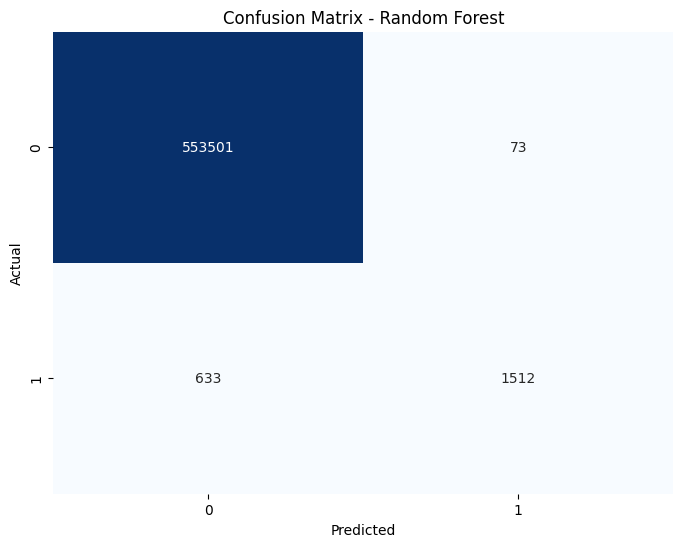

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.95      0.70      0.81      2145

    accuracy                           1.00    555719
   macro avg       0.98      0.85      0.91    555719
weighted avg       1.00      1.00      1.00    555719



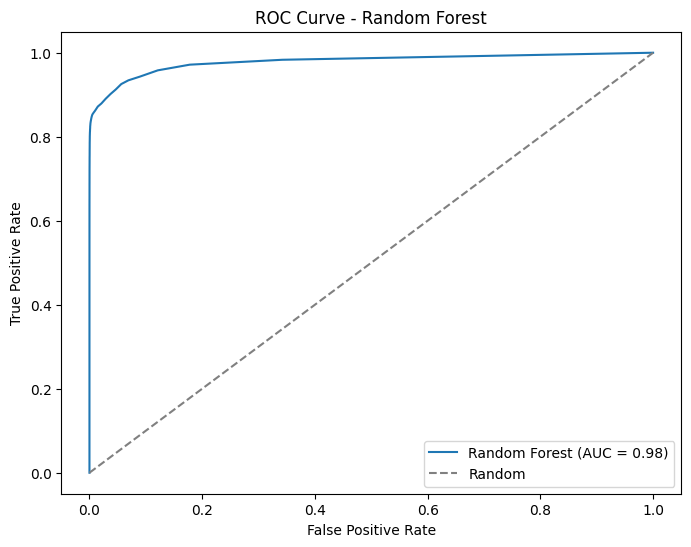

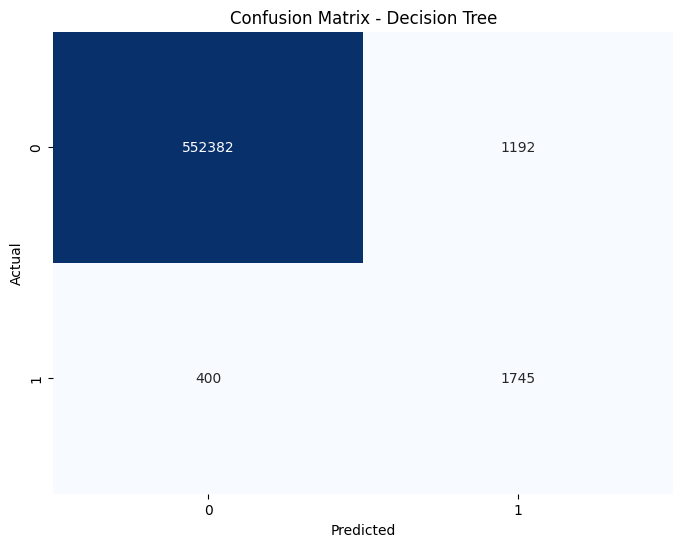

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.59      0.81      0.69      2145

    accuracy                           1.00    555719
   macro avg       0.80      0.91      0.84    555719
weighted avg       1.00      1.00      1.00    555719



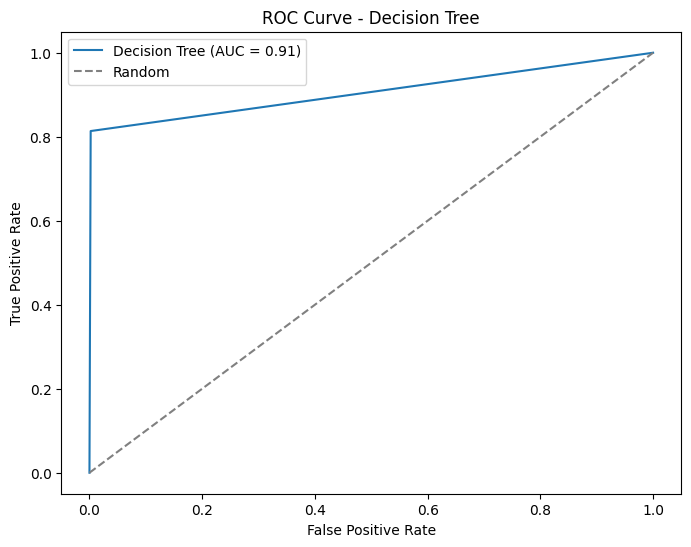

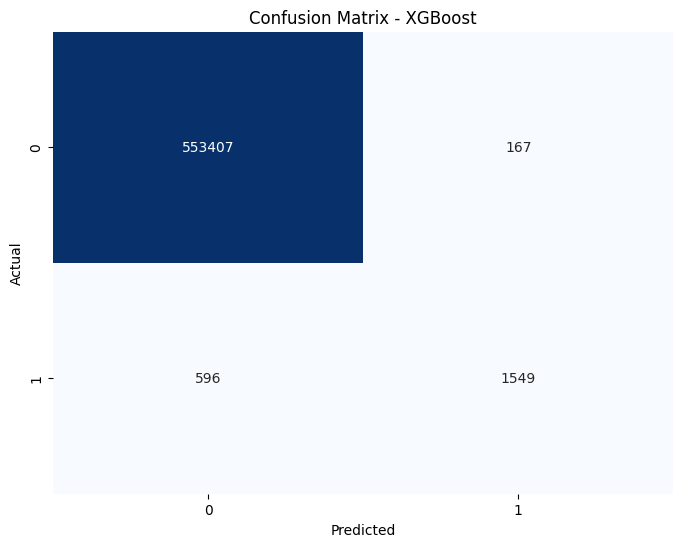

Classification Report - XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.90      0.72      0.80      2145

    accuracy                           1.00    555719
   macro avg       0.95      0.86      0.90    555719
weighted avg       1.00      1.00      1.00    555719



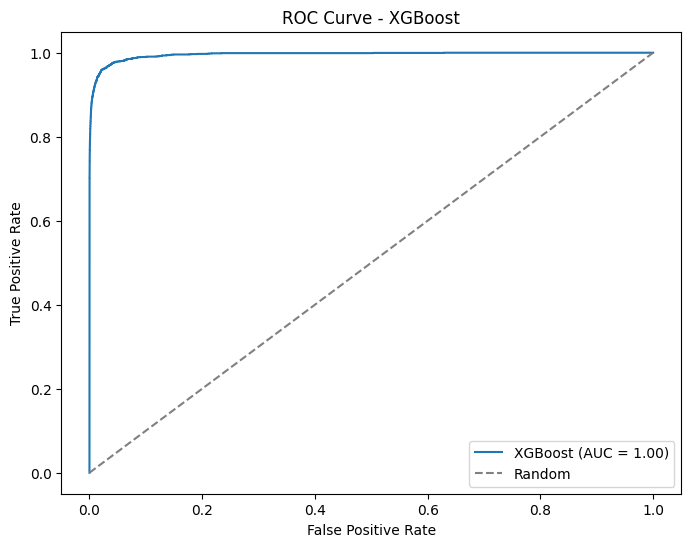

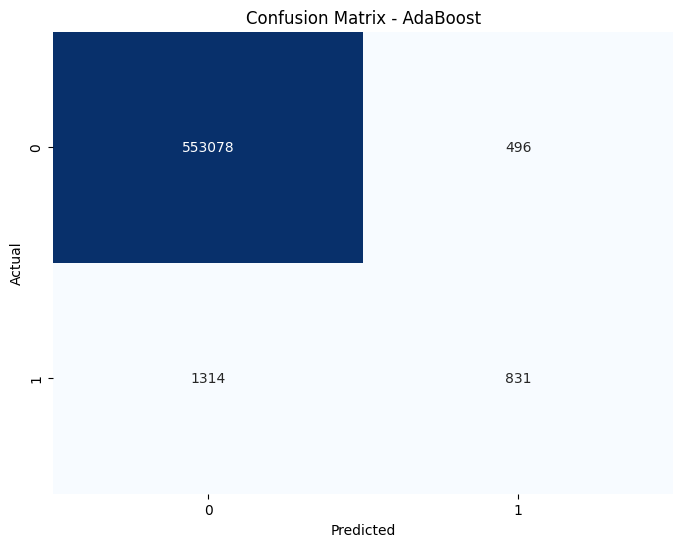

Classification Report - AdaBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.63      0.39      0.48      2145

    accuracy                           1.00    555719
   macro avg       0.81      0.69      0.74    555719
weighted avg       1.00      1.00      1.00    555719



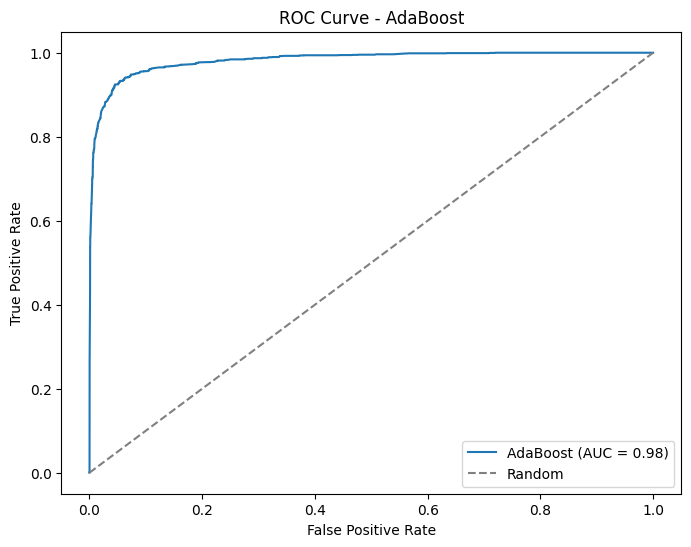

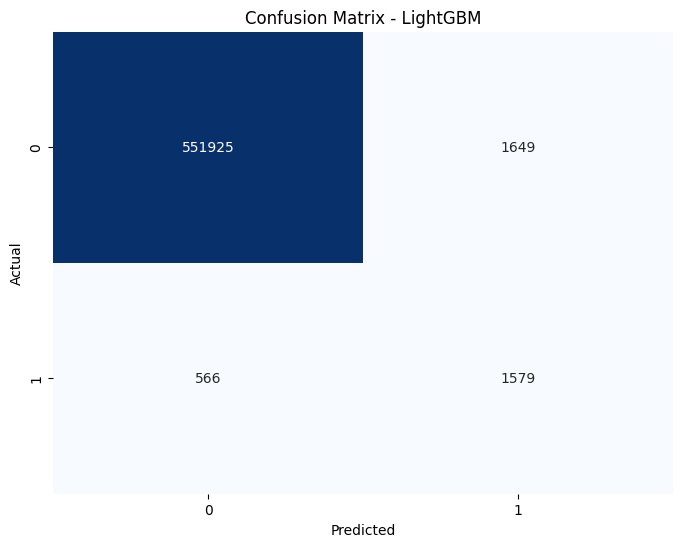

Classification Report - LightGBM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.49      0.74      0.59      2145

    accuracy                           1.00    555719
   macro avg       0.74      0.87      0.79    555719
weighted avg       1.00      1.00      1.00    555719



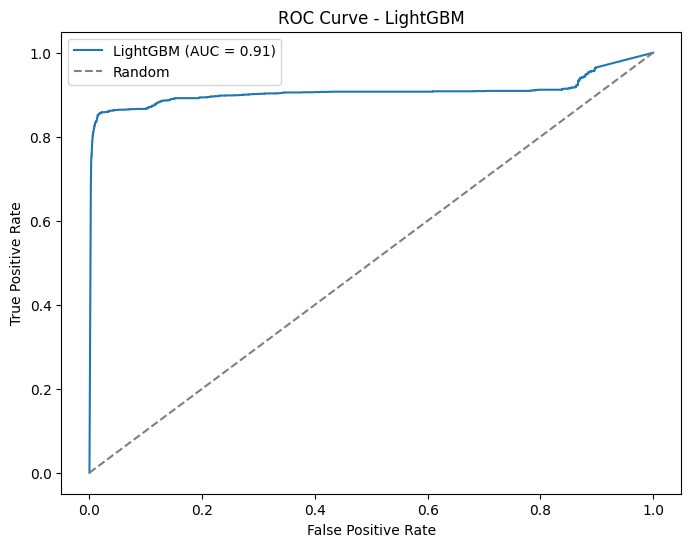

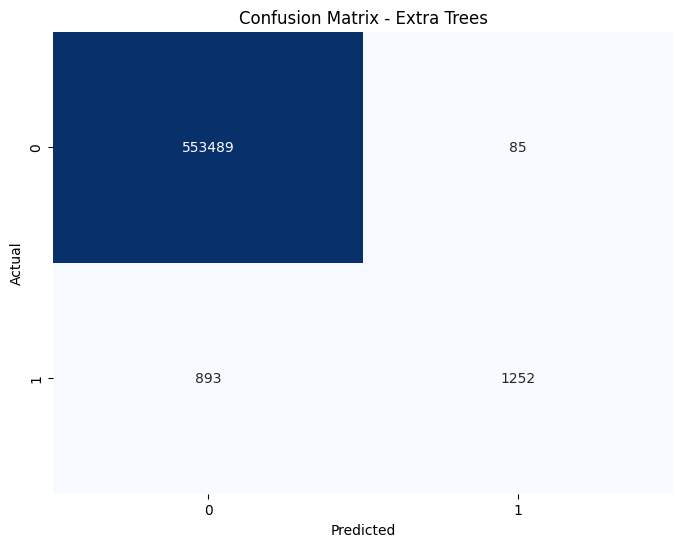

Classification Report - Extra Trees:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.94      0.58      0.72      2145

    accuracy                           1.00    555719
   macro avg       0.97      0.79      0.86    555719
weighted avg       1.00      1.00      1.00    555719



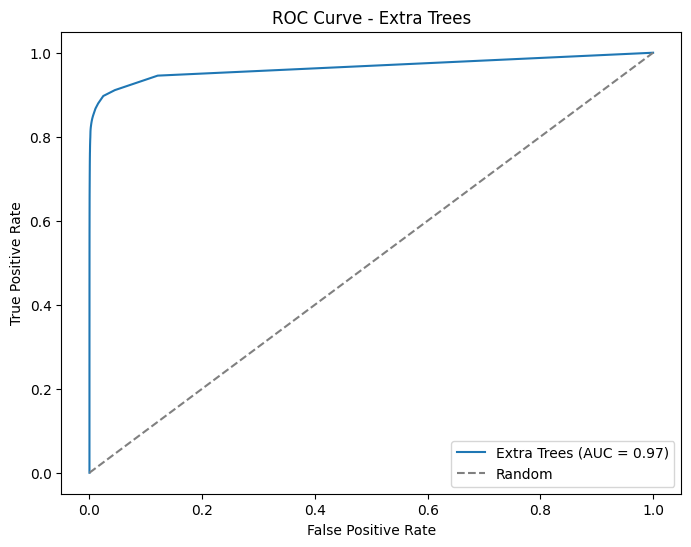

In [130]:
# Train and evaluate each model
for label, model in models.items():
    model.fit(X_train2, y_train2)
    models_inf1.append(model)
    evaluate_model(model, X_test2, y_test2, label)

In [132]:
# Make predictions on the test data
rf_predictions = models_inf1[0].predict(X_test2)

In [133]:
count_ones = np.count_nonzero(rf_predictions == 1)
count_ones

1585

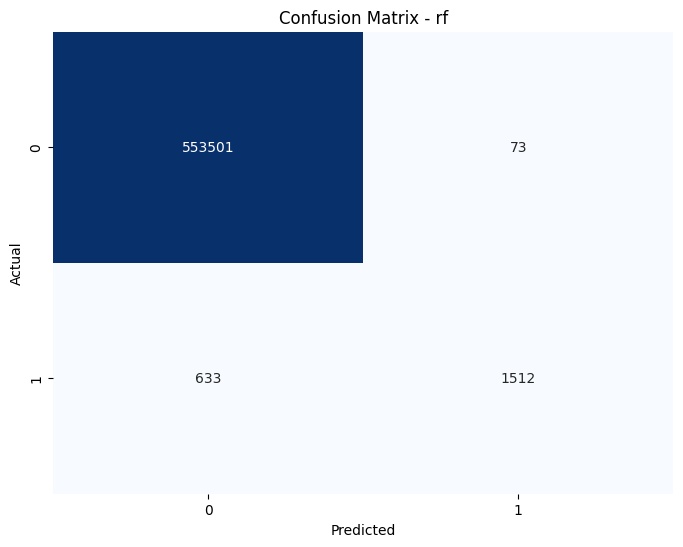

Classification Report - rf:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.95      0.70      0.81      2145

    accuracy                           1.00    555719
   macro avg       0.98      0.85      0.91    555719
weighted avg       1.00      1.00      1.00    555719



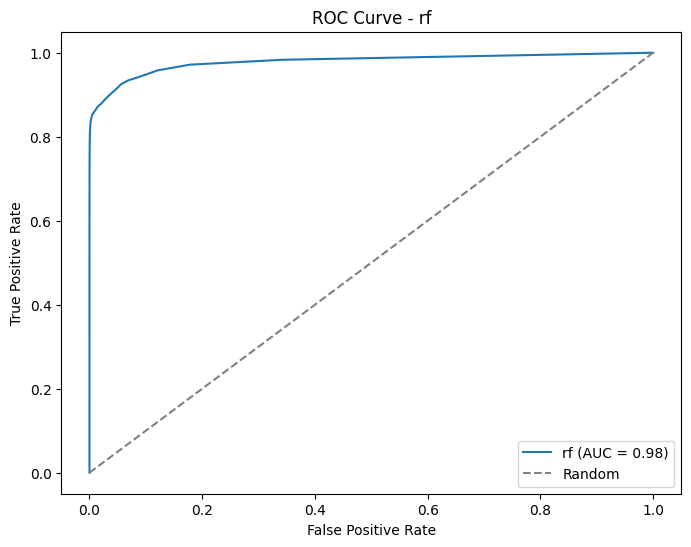

In [134]:
evaluate_model(models_inf1[0], X_test2, y_test2, 'rf')

In [135]:
# Create submission DataFrames
rf_submission = pd.DataFrame({'ID': unnamed_column + 1, 'is_fraud': rf_predictions})

In [136]:
# Save the submissions to CSV files
rf_submission.to_csv('rf_submission.csv', index=False)

In [105]:
train_data

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,...,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,is_fraud
1,3.174236,3.240299,-0.002704,2.284008,0.300060,-1.749132,0.450378,-2.300033,1.766818,-0.074331,...,-1.014883,0.724226,-0.260739,-0.030064,0.168498,0.009203,-0.434016,0.963729,-0.048639,0
2,2.408867,1.750332,0.486313,1.828230,0.567996,-1.703499,0.384901,-2.283739,0.073908,-0.324934,...,0.051923,-0.104547,0.156573,-0.108791,0.037114,0.136584,-0.039426,-0.139025,0.034779,0
3,3.299230,2.760119,0.096738,1.655509,-0.332720,-1.747365,0.843990,-2.239610,-0.848469,0.553213,...,1.038736,-0.452591,0.311281,-0.241687,-0.008466,0.160840,-0.406729,0.368648,-0.045562,0
5,3.196313,0.379099,0.599087,-1.537834,-0.209181,-1.713403,1.054284,-2.234413,-1.323682,1.195885,...,0.902066,-0.172005,0.039143,0.061327,0.019013,0.014181,-0.089717,0.707771,-0.047861,0
7,3.322871,0.186987,0.707559,-1.321404,-0.326545,-1.698683,1.544634,-2.238253,-1.517855,0.514823,...,0.841275,-0.406356,0.226946,-0.396721,0.033508,0.223572,-0.299558,0.172028,-0.020701,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296661,-0.501929,0.077553,-1.007742,-1.315356,-0.140893,2.812250,0.415451,0.718664,0.756170,-1.566603,...,-0.957955,0.854154,0.787587,0.813667,0.028941,-0.249770,0.035231,0.139746,-0.015326,0
1296663,-0.616933,-0.161352,-0.800210,0.125203,-0.145156,2.824631,0.233538,0.717351,0.671294,-0.992500,...,-0.959655,1.079994,0.593702,1.157586,0.043124,-0.387839,0.247213,0.613022,-0.021098,0
1296664,0.199308,0.736843,-1.275517,-1.915275,-0.042237,2.826636,-0.216752,0.658445,0.047381,0.382429,...,-0.020103,0.154805,-0.121550,0.223068,-0.000766,-0.129911,0.109988,0.361197,-0.009162,0
1296665,-0.422610,1.430692,-1.433388,-1.041658,-0.104943,2.792621,0.270538,0.718021,0.882465,-1.535395,...,-0.936056,0.875024,0.799004,0.864330,0.031668,-0.265523,0.019604,0.189620,-0.024406,0


In [49]:
# Assuming 'is_fraud' is the target variable
X_train2 = train_data.drop('is_fraud', axis=1)
y_train2 = train_data['is_fraud']

In [127]:
X_train2

,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_hour,trans_day,...,category_shopping_net,category_shopping_pos,category_travel,gender_M,amt_range_500-1000,amt_range_1000-1500,amt_range_1500-2000,amt_range_2000-2500,amt_range_2500-3000,amt_range_3000+
0,2703186189652095,4.97,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,1,...,False,False,False,False,False,False,False,False,False,False
1,630423337322,107.23,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,1,...,False,False,False,False,False,False,False,False,False,False
2,38859492057661,220.11,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,1,...,False,False,False,True,False,False,False,False,False,False
3,3534093764340240,45.00,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,1,...,False,False,False,True,False,False,False,False,False,False
4,375534208663984,41.96,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,1,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,12,6,...,False,False,False,True,False,False,False,False,False,False
1296671,6011149206456997,51.70,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,12,6,...,False,False,False,True,False,False,False,False,False,False
1296672,3514865930894695,105.93,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,12,6,...,False,False,False,True,False,False,False,False,False,False
1296673,2720012583106919,74.90,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,12,6,...,False,False,False,True,False,False,False,False,False,False


In [128]:
X_test2

,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_hour,trans_day,...,category_shopping_net,category_shopping_pos,category_travel,gender_M,amt_range_500-1000,amt_range_1000-1500,amt_range_1500-2000,amt_range_2000-2500,amt_range_2500-3000,amt_range_3000+
0,2291163933867244,2.86,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,12,6,...,False,False,False,True,False,False,False,False,False,False
1,3573030041201292,29.84,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,12,6,...,False,False,False,False,False,False,False,False,False,False
2,3598215285024754,41.28,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,12,6,...,False,False,False,False,False,False,False,False,False,False
3,3591919803438423,60.05,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,12,6,...,False,False,False,True,False,False,False,False,False,False
4,3526826139003047,3.19,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,12,6,...,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,43.77,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,23,3,...,False,False,False,True,False,False,False,False,False,False
555715,3556613125071656,111.84,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,23,3,...,False,False,False,True,False,False,False,False,False,False
555716,6011724471098086,86.88,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,23,3,...,False,False,False,False,False,False,False,False,False,False
555717,4079773899158,7.99,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,23,3,...,False,False,True,True,False,False,False,False,False,False


In [50]:
# Assuming 'is_fraud' is the target variable
X_test2 = test_df.drop('is_fraud', axis=1)
y_test2 = test_df['is_fraud']

In [138]:
models_inf2 = []

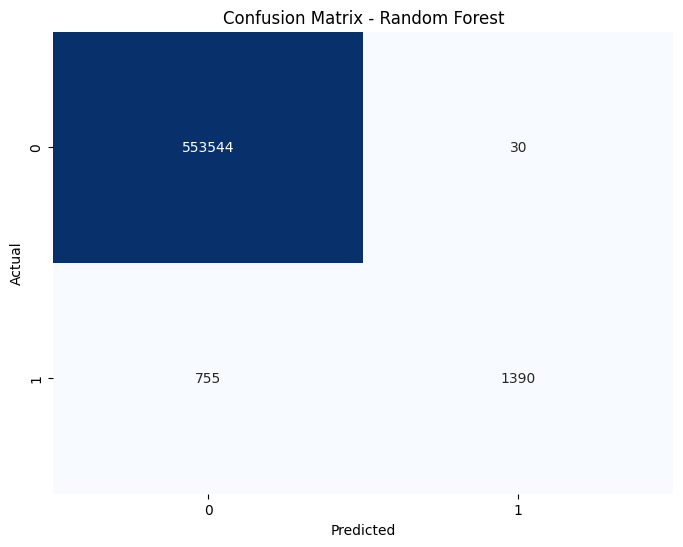

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.98      0.65      0.78      2145

    accuracy                           1.00    555719
   macro avg       0.99      0.82      0.89    555719
weighted avg       1.00      1.00      1.00    555719



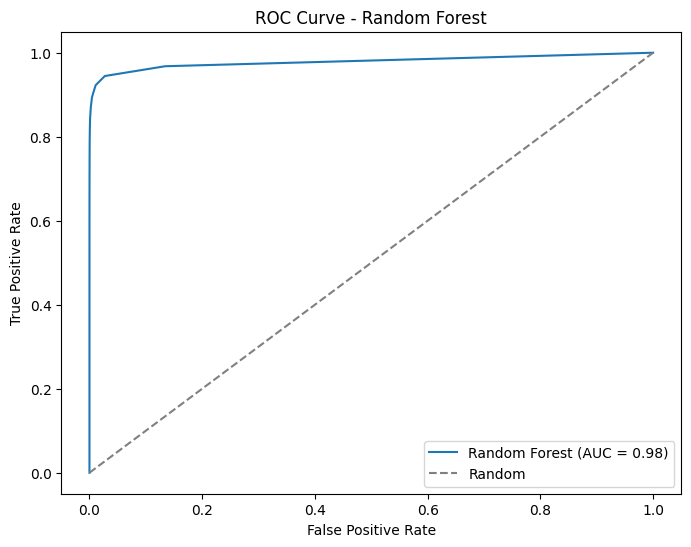

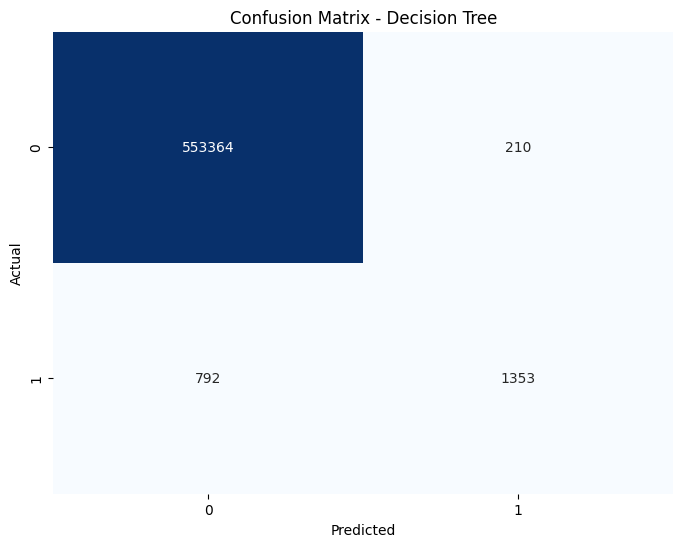

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.87      0.63      0.73      2145

    accuracy                           1.00    555719
   macro avg       0.93      0.82      0.86    555719
weighted avg       1.00      1.00      1.00    555719



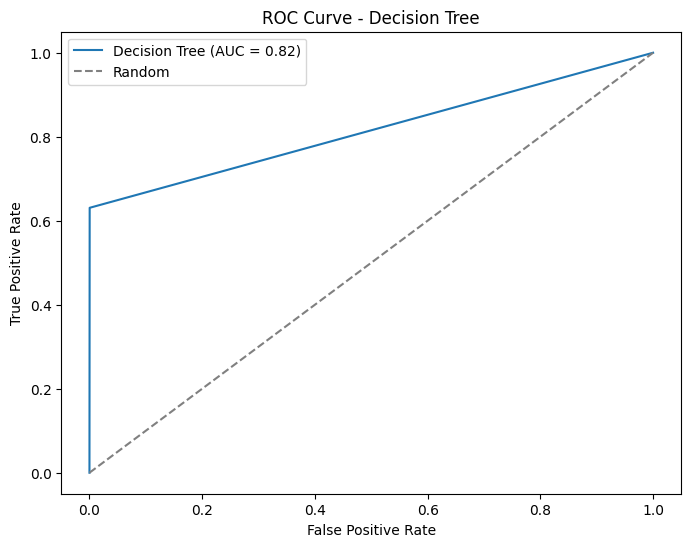

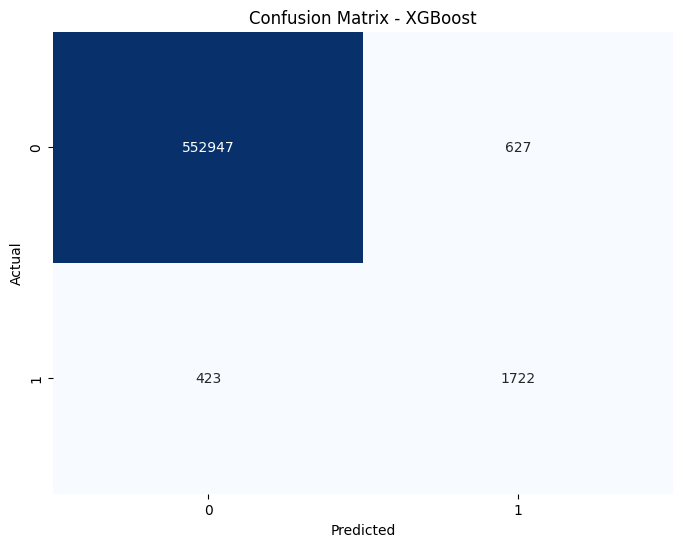

Classification Report - XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.73      0.80      0.77      2145

    accuracy                           1.00    555719
   macro avg       0.87      0.90      0.88    555719
weighted avg       1.00      1.00      1.00    555719



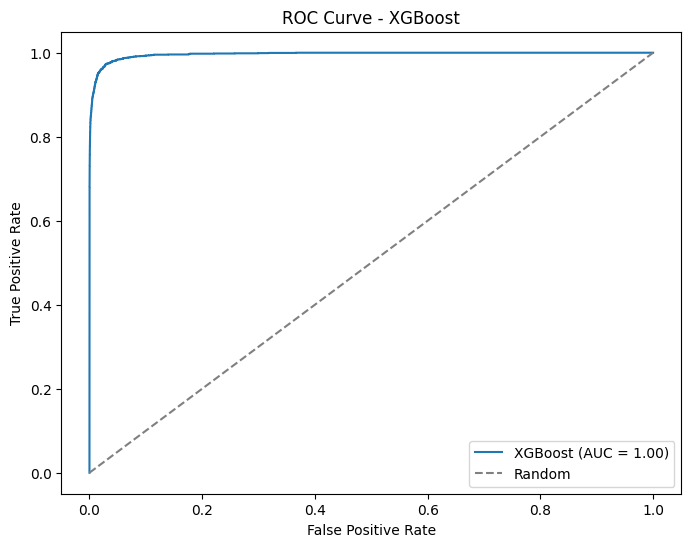

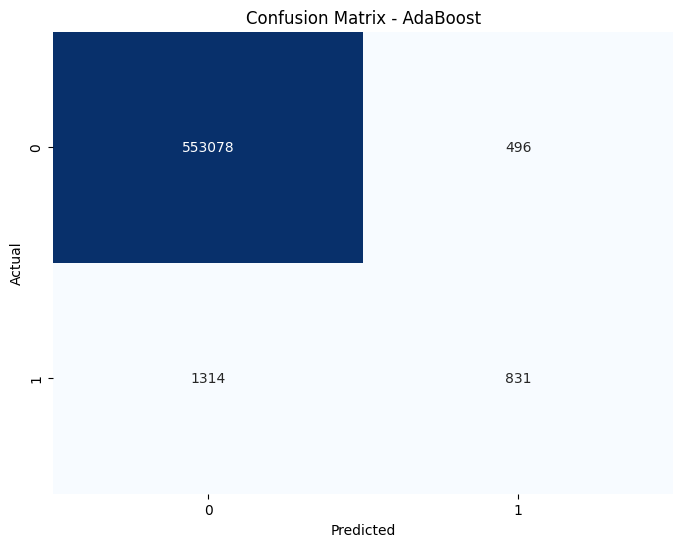

Classification Report - AdaBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.63      0.39      0.48      2145

    accuracy                           1.00    555719
   macro avg       0.81      0.69      0.74    555719
weighted avg       1.00      1.00      1.00    555719



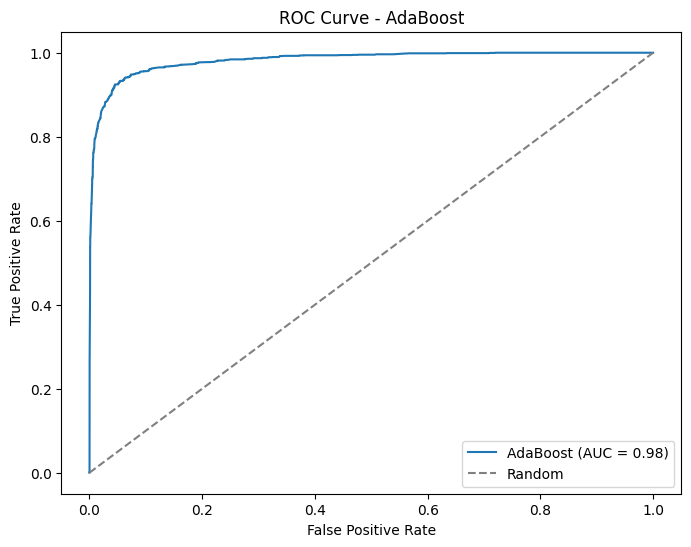

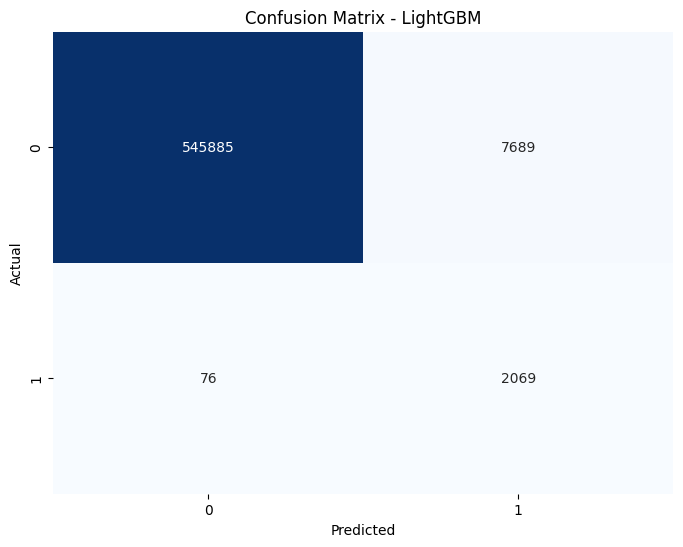

Classification Report - LightGBM:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.21      0.96      0.35      2145

    accuracy                           0.99    555719
   macro avg       0.61      0.98      0.67    555719
weighted avg       1.00      0.99      0.99    555719



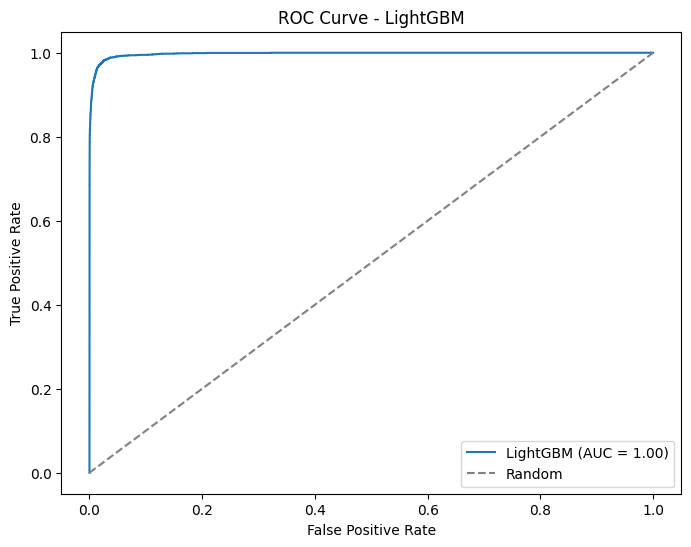

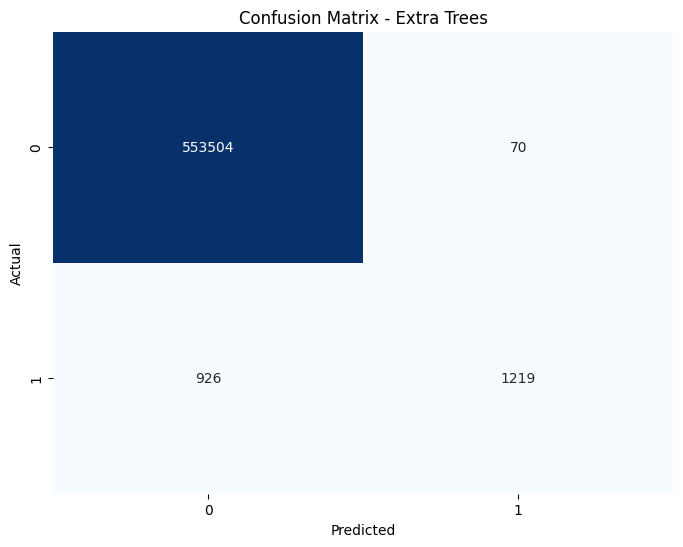

Classification Report - Extra Trees:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.95      0.57      0.71      2145

    accuracy                           1.00    555719
   macro avg       0.97      0.78      0.85    555719
weighted avg       1.00      1.00      1.00    555719



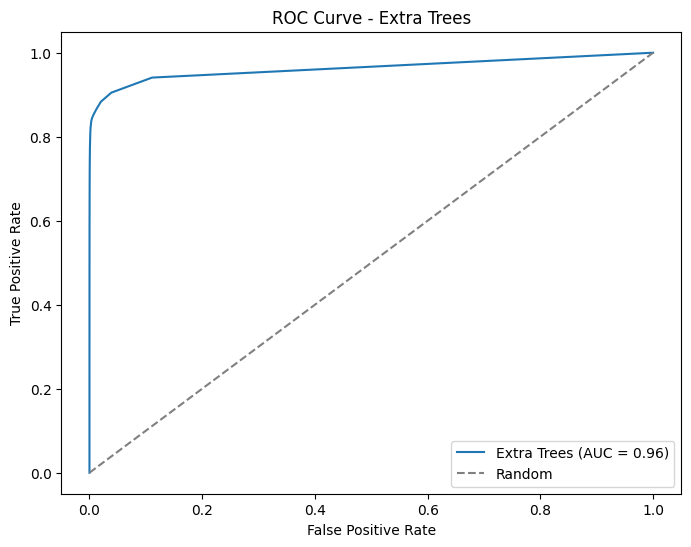

In [139]:
# Train and evaluate each model
for label, model in models2.items():
    model.fit(X_train2, y_train2)
    models_inf2.append(model)
    evaluate_model(model, X_test2, y_test2, label)

In [140]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X_train2, y_train2)

In [143]:
# Define and train the models
models3 = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'LightGBM': LGBMClassifier(),
    'Extra Trees': ExtraTreesClassifier()
}

In [142]:
 models_inf3 = []

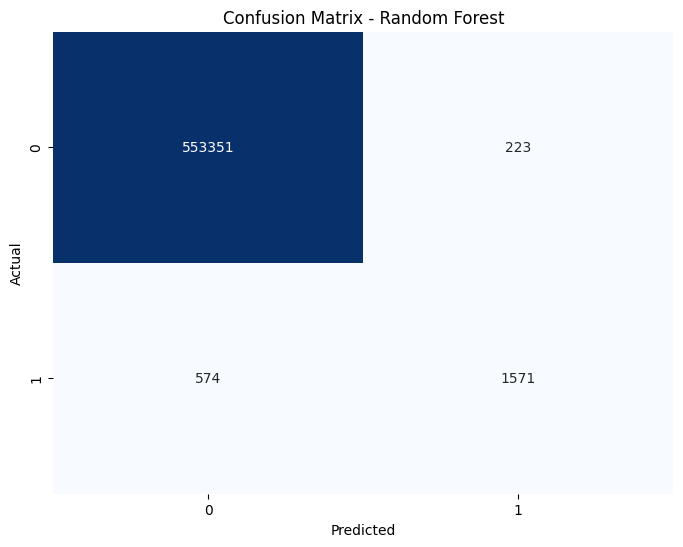

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.88      0.73      0.80      2145

    accuracy                           1.00    555719
   macro avg       0.94      0.87      0.90    555719
weighted avg       1.00      1.00      1.00    555719



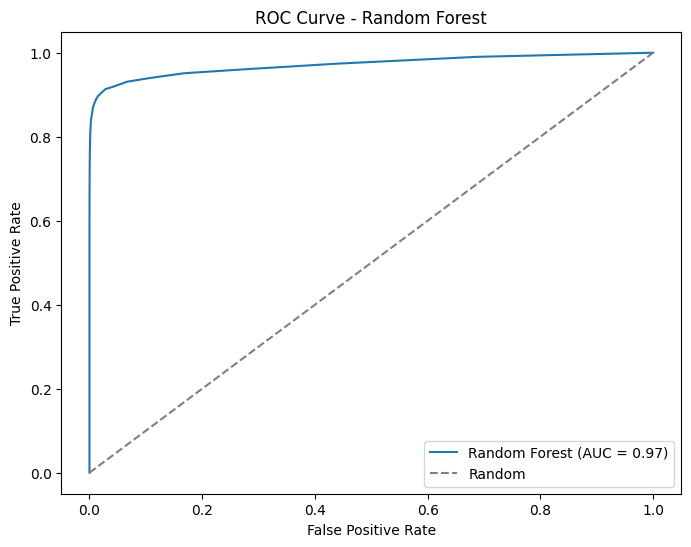

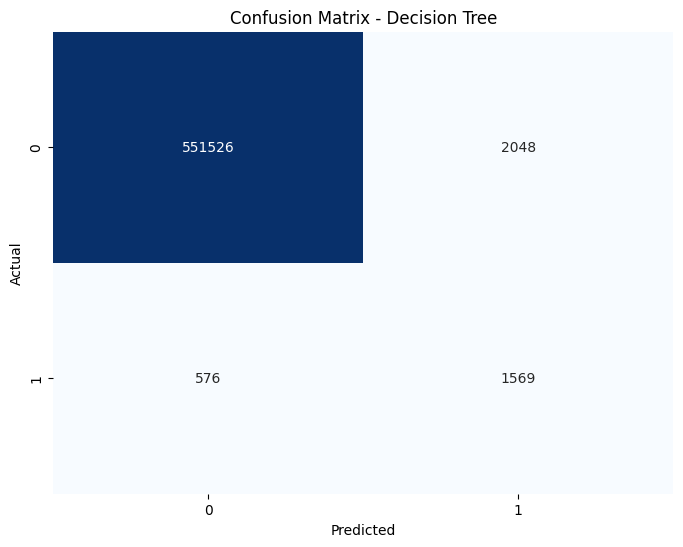

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.43      0.73      0.54      2145

    accuracy                           1.00    555719
   macro avg       0.72      0.86      0.77    555719
weighted avg       1.00      1.00      1.00    555719



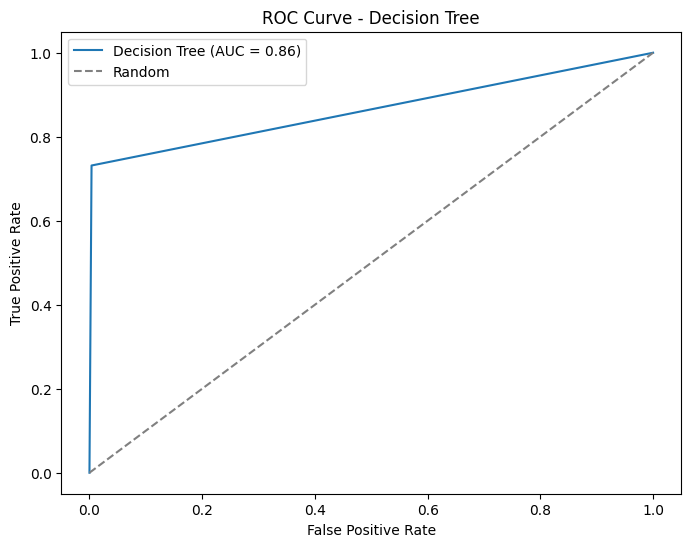

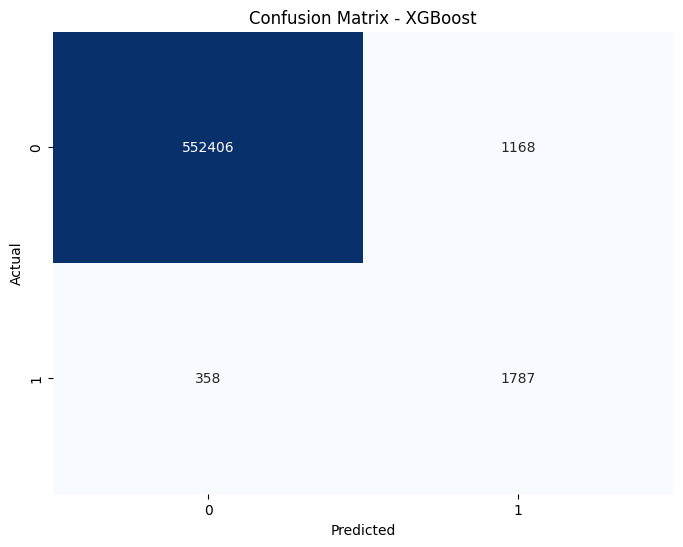

Classification Report - XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.60      0.83      0.70      2145

    accuracy                           1.00    555719
   macro avg       0.80      0.92      0.85    555719
weighted avg       1.00      1.00      1.00    555719



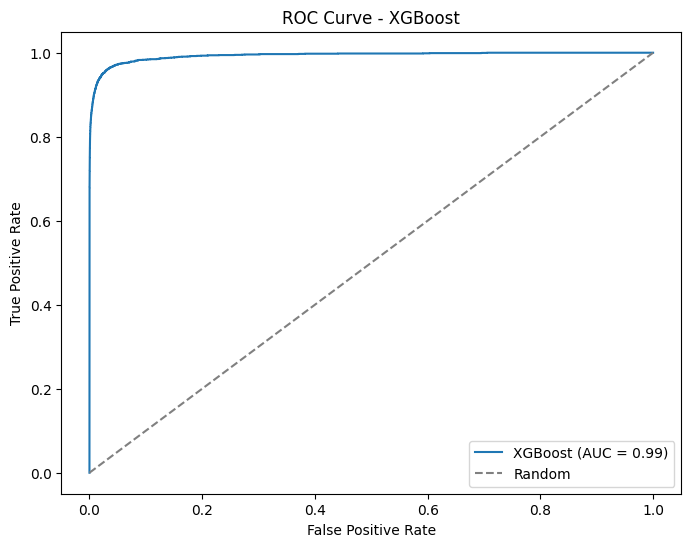

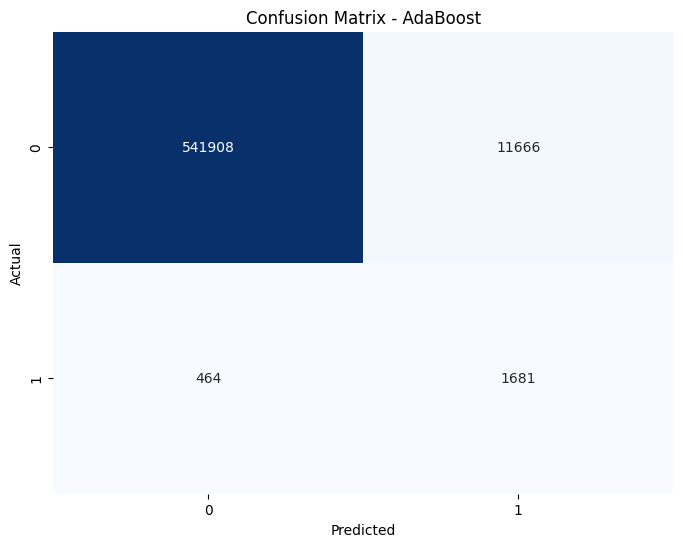

Classification Report - AdaBoost:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.13      0.78      0.22      2145

    accuracy                           0.98    555719
   macro avg       0.56      0.88      0.60    555719
weighted avg       1.00      0.98      0.99    555719



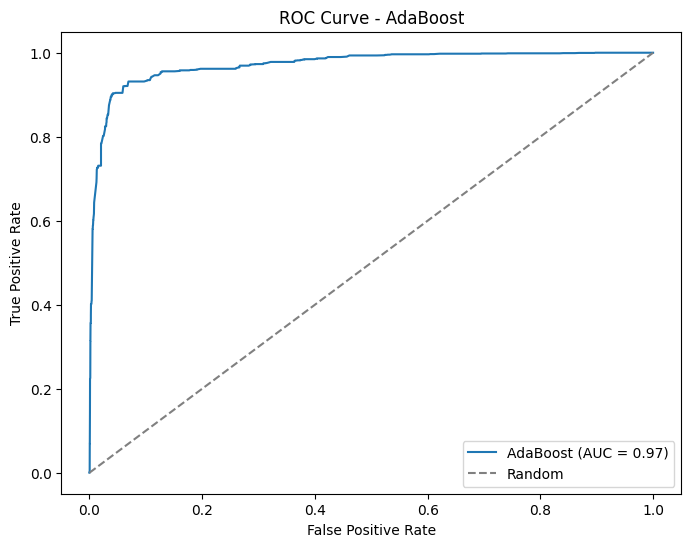

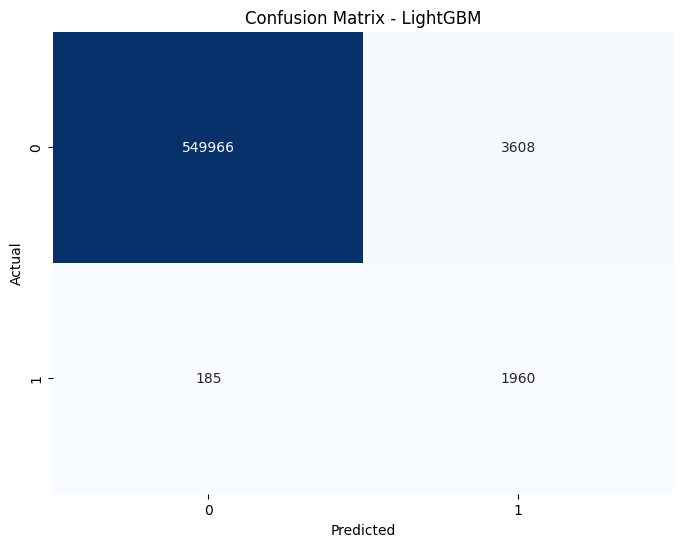

Classification Report - LightGBM:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.35      0.91      0.51      2145

    accuracy                           0.99    555719
   macro avg       0.68      0.95      0.75    555719
weighted avg       1.00      0.99      0.99    555719



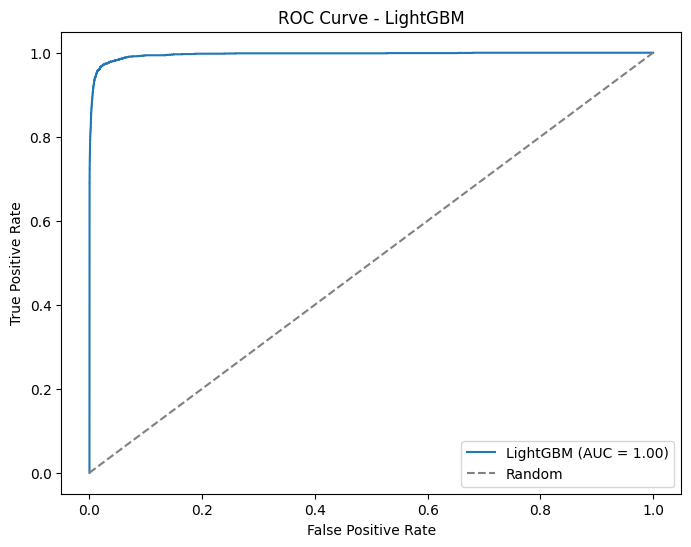

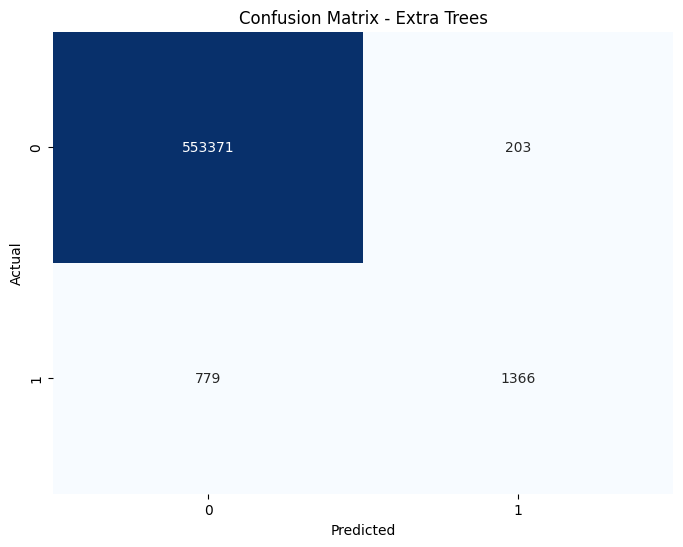

Classification Report - Extra Trees:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.87      0.64      0.74      2145

    accuracy                           1.00    555719
   macro avg       0.93      0.82      0.87    555719
weighted avg       1.00      1.00      1.00    555719



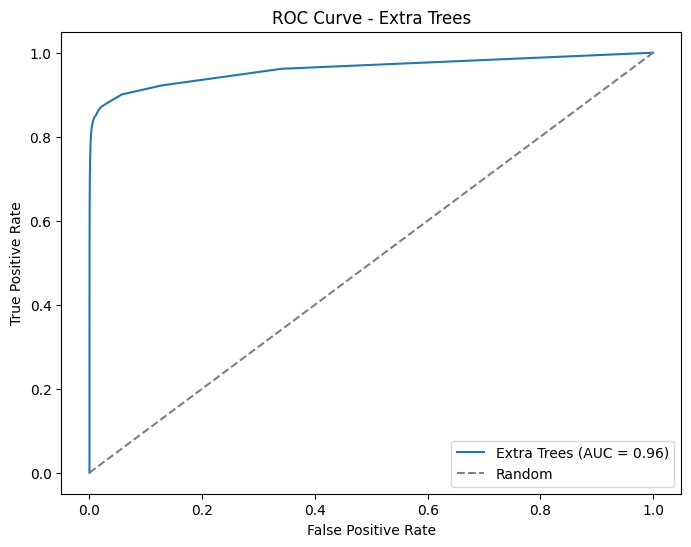

In [144]:
# Train and evaluate each model
for label, model in models3.items():
    model.fit(X_over, y_over)
    models_inf3.append(model)
    evaluate_model(model, X_test2, y_test2, label)

In [ ]:
# Make predictions on the test data
rf_predictions = models_inf[0].predict(X_test2)

In [ ]:
len(rf_predictions)

In [ ]:
count_ones = np.count_nonzero(rf_predictions == 1)

In [ ]:
count_ones

In [ ]:
# Create submission DataFrames
rf_submission = pd.DataFrame({'ID': unnamed_column + 1, 'is_fraud': rf_predictions})

In [ ]:
# Save the submissions to CSV files
rf_submission.to_csv('rf_submission.csv', index=False)

In [ ]:
# Make predictions on the test data
et_predictions = models_inf[5].predict(X_test2)

In [ ]:
# Create submission DataFrames
et_submission = pd.DataFrame({'ID': unnamed_column + 1, 'is_fraud': et_predictions})

In [ ]:
# Save the submissions to CSV files
et_submission.to_csv('et_submission.csv', index=False)

In [ ]:
# Train and evaluate each model
for label, model in models.items():
    model.fit(X_train2, y_train2)
    models_inf.append(model)
    evaluate_model(model, X_test2, y_test2, label)

In [ ]:
# Make predictions on the test data
rf2_predictions = models_inf[0].predict(X_test2)

In [ ]:
count_ones = np.count_nonzero(rf_predictions == 1)
count_ones

In [ ]:
evaluate_model(models_inf[0], X_test2, y_test2, 'rf')

In [ ]:
# Create submission DataFrames
rf2_submission = pd.DataFrame({'ID': unnamed_column + 1, 'is_fraud': rf2_predictions})

In [ ]:
# Save the submissions to CSV files
rf2_submission.to_csv('rf2_submission.csv', index=False)

In [ ]:
# Make predictions on the test data
xg_predictions = models_inf[2].predict(X_test2)

In [ ]:
count_ones = np.count_nonzero(xg_predictions == 1)
count_ones

In [ ]:
evaluate_model(models_inf[2], X_test2, y_test2, 'xg')

In [ ]:
# Create submission DataFrames
xg_submission = pd.DataFrame({'ID': unnamed_column + 1, 'is_fraud': xg_predictions})

In [ ]:
# Save the submissions to CSV files
xg_submission.to_csv('xg_submission.csv', index=False)

In [55]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier

In [146]:
# Under-sampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_und, y_und = rus.fit_resample(X_train2, y_train2)

In [147]:
# Random Forest Classifier on under-sampled data
rf_classifier_under = RandomForestClassifier(random_state=42)
rf_classifier_under.fit(X_und, y_und)

RandomForestClassifier(random_state=42)

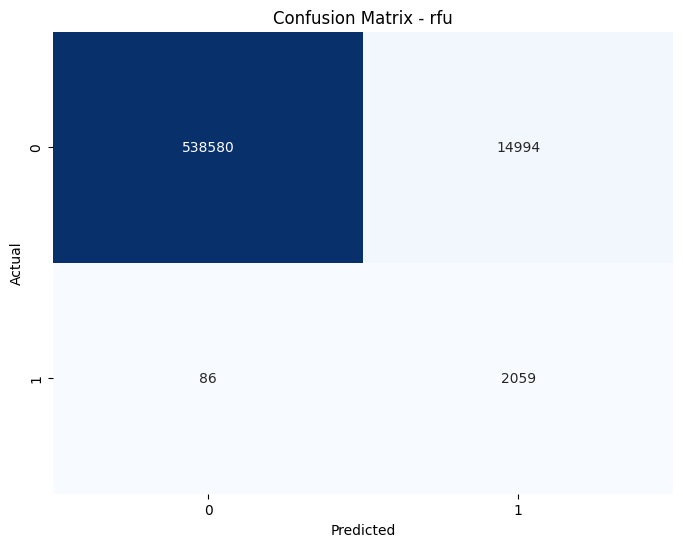

Classification Report - rfu:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    553574
           1       0.12      0.96      0.21      2145

    accuracy                           0.97    555719
   macro avg       0.56      0.97      0.60    555719
weighted avg       1.00      0.97      0.98    555719



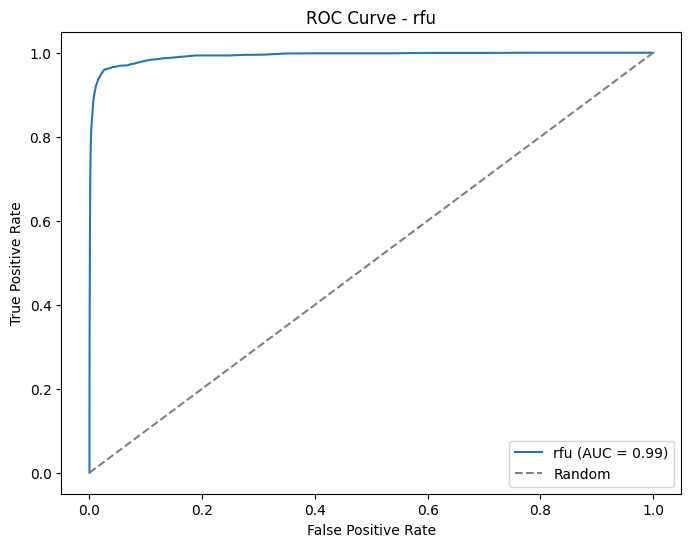

In [148]:
evaluate_model(rf_classifier_under, X_test2, y_test2, 'rfu')

In [149]:
# Random Forest Classifier on over-sampled data
rf_classifier_over = RandomForestClassifier(random_state=42)
rf_classifier_over.fit(X_over, y_over)

RandomForestClassifier(random_state=42)

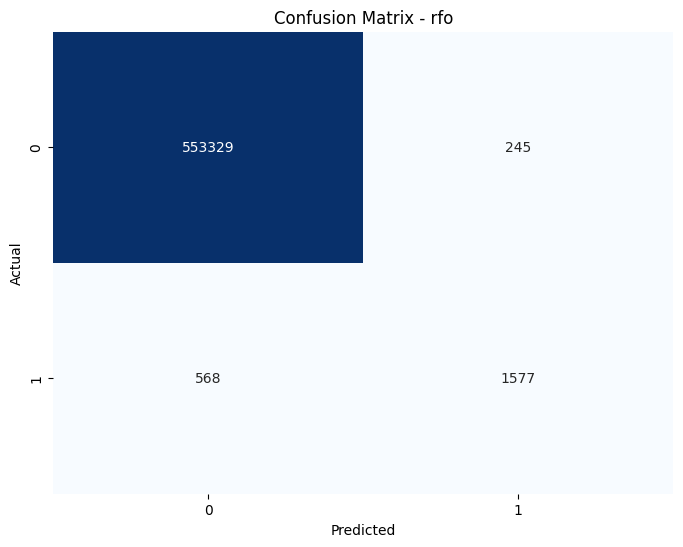

Classification Report - rfo:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.87      0.74      0.80      2145

    accuracy                           1.00    555719
   macro avg       0.93      0.87      0.90    555719
weighted avg       1.00      1.00      1.00    555719



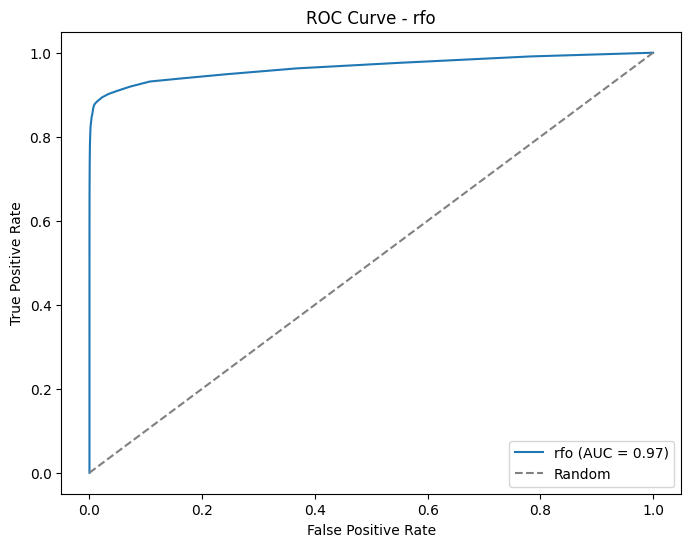

In [150]:
evaluate_model(rf_classifier_over, X_test2, y_test2, 'rfo')

In [151]:
# Balanced Random Forest Classifier
brf_classifier = BalancedRandomForestClassifier(random_state=42)
brf_classifier.fit(X_train2, y_train2)

/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning:

The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.

/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning:

The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.



BalancedRandomForestClassifier(random_state=42)

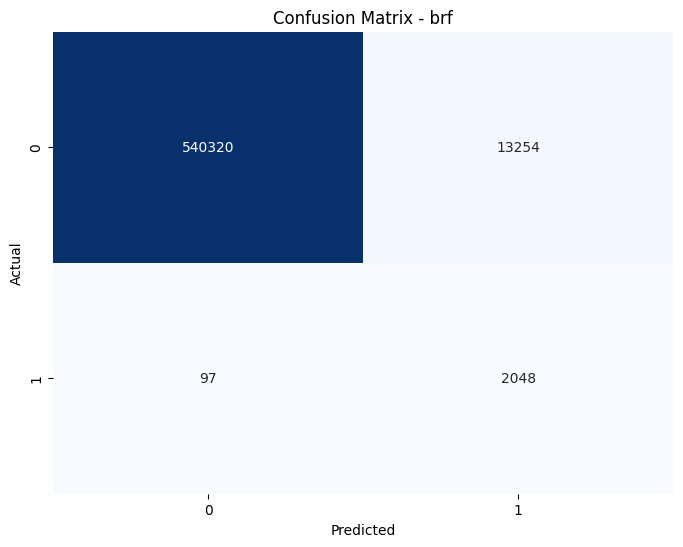

Classification Report - brf:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.13      0.95      0.23      2145

    accuracy                           0.98    555719
   macro avg       0.57      0.97      0.61    555719
weighted avg       1.00      0.98      0.98    555719



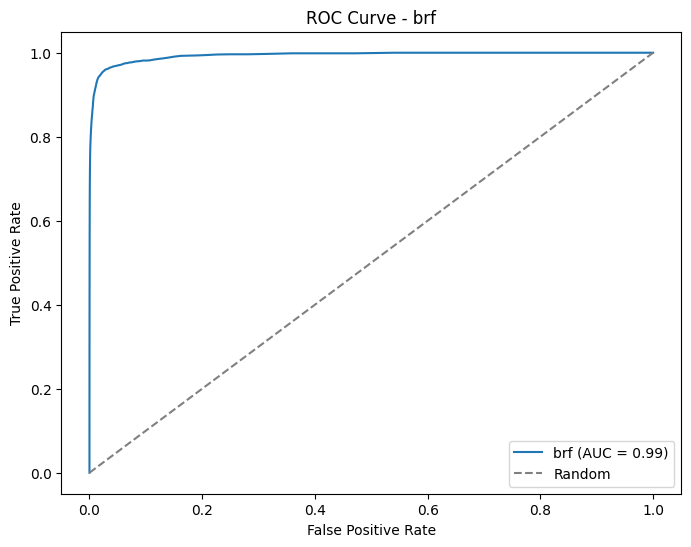

In [152]:
evaluate_model(brf_classifier, X_test2, y_test2, 'brf')

In [53]:
from sklearn.ensemble import VotingClassifier

In [60]:
# Define different classifiers
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
random_forest_classifier = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [155]:
# Create an ensemble of different models using VotingClassifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ('decision_tree', decision_tree_classifier),
        ('random_forest', random_forest_classifier),
        ('xgboost', xgboost_classifier)
    ],
    voting='soft' 
)

In [156]:
# Train the ensemble model
ensemble_classifier.fit(X_train2, y_train2)

VotingClassifier(estimators=[('decision_tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

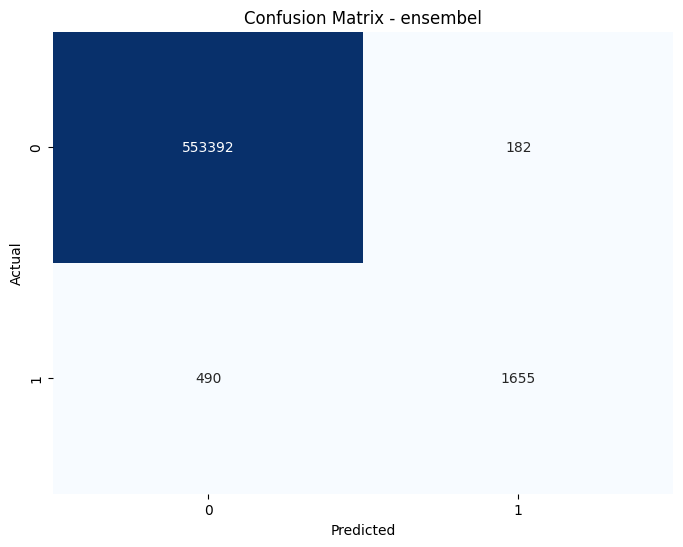

Classification Report - ensembel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.90      0.77      0.83      2145

    accuracy                           1.00    555719
   macro avg       0.95      0.89      0.92    555719
weighted avg       1.00      1.00      1.00    555719



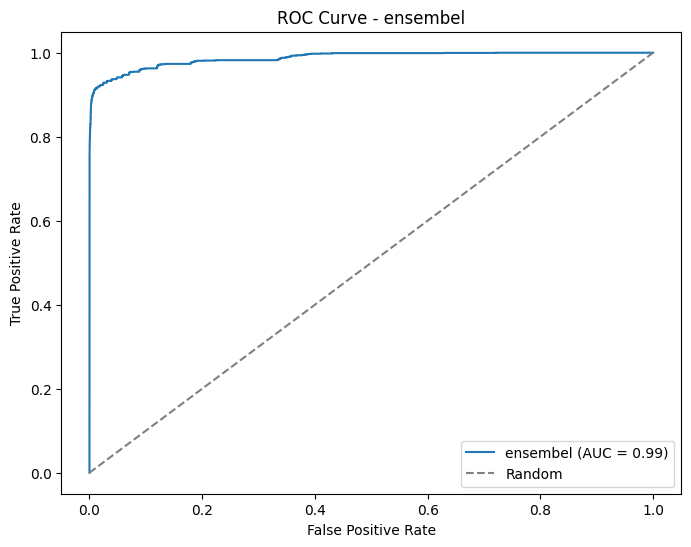

In [157]:
 evaluate_model(ensemble_classifier, X_test2, y_test2, 'ensembel')

In [158]:
# Make predictions on the test data
ens_predictions =  ensemble_classifier.predict(X_test2)

In [159]:
# Create submission DataFrames
ens_submission = pd.DataFrame({'ID': unnamed_column + 1, 'is_fraud': ens_predictions})

In [161]:
# Save the submissions to CSV files
ens_submission.to_csv('ens_submission.csv', index=False)

In [162]:
svc_classifier = SVC(probability=True, random_state=42)

In [51]:
logistic_classifier = LogisticRegression(random_state=42)

In [61]:
ensemble_classifier2 = VotingClassifier(
    estimators=[
#         ('decision_tree', decision_tree_classifier),
        ('random_forest', random_forest_classifier),
        ('xgboost', xgboost_classifier),
#         ('svc', svc_classifier),
        ('logistic', logistic_classifier)
    ],
    voting='soft'  # Use 'soft' for probability voting
)


In [62]:
# Train the ensemble model
ensemble_classifier2.fit(X_train2, y_train2)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('logistic', LogisticRegression(random_state=42))],
                 voting='soft')

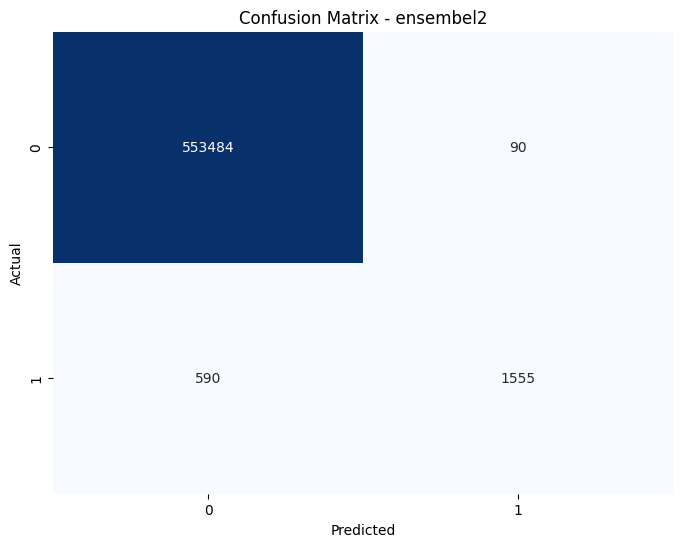

Classification Report - ensembel2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.95      0.72      0.82      2145

    accuracy                           1.00    555719
   macro avg       0.97      0.86      0.91    555719
weighted avg       1.00      1.00      1.00    555719



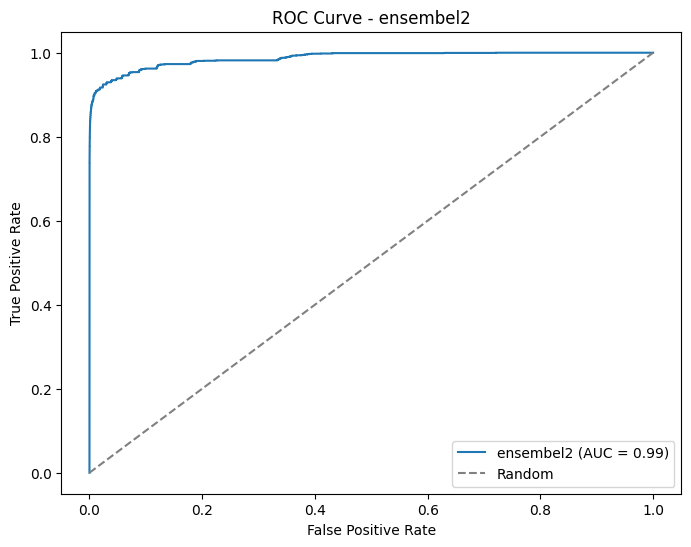

In [66]:
evaluate_model(ensemble_classifier2, X_test2, y_test2, 'ensembel2')

In [67]:
from sklearn.ensemble import IsolationForest

In [68]:
# Implement anomaly detection using Isolation Forest
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
isolation_forest.fit(X_train2)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.01, random_state=42)

In [69]:
# Predict anomalies in the test set
y_pred_anomalies = isolation_forest.predict(X_test2)

In [70]:
# Convert predictions to binary labels (0 for normal, 1 for anomaly)
y_pred_anomalies_binary = np.where(y_pred_anomalies == 1, 0, 1)

In [71]:
print("Anomaly Detection using Isolation Forest:")
print(classification_report(y_test2, y_pred_anomalies_binary))

Anomaly Detection using Isolation Forest:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    553574
           1       0.06      0.42      0.10      2145

    accuracy                           0.97    555719
   macro avg       0.53      0.70      0.54    555719
weighted avg       0.99      0.97      0.98    555719



In [72]:
ensemble_classifier3 = VotingClassifier(
    estimators=[
        ('decision_tree', decision_tree_classifier),
        ('random_forest', random_forest_classifier),
        ('xgboost', xgboost_classifier),
#         ('svc', svc_classifier),
        ('logistic', logistic_classifier)
    ],
    voting='soft'  # Use 'soft' for probability voting
)


In [73]:
# Train the ensemble model
ensemble_classifier3.fit(X_train2, y_train2)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



VotingClassifier(estimators=[('decision_tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('logistic', LogisticRegression(random_state=42))],
                 voting='soft')

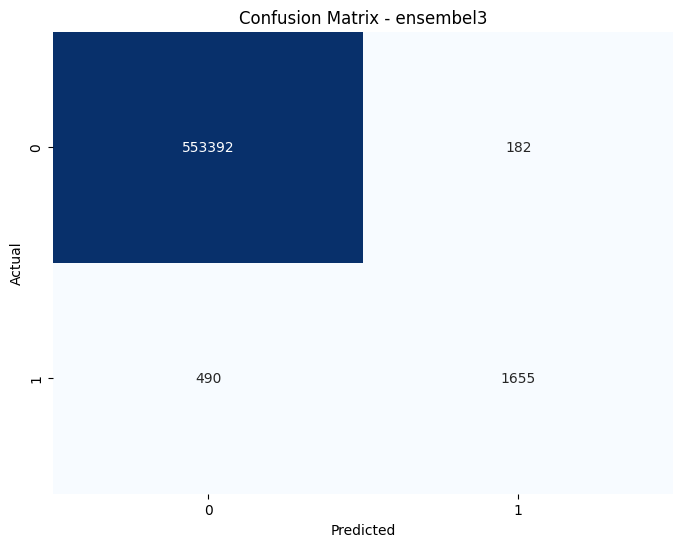

Classification Report - ensembel3:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.90      0.77      0.83      2145

    accuracy                           1.00    555719
   macro avg       0.95      0.89      0.92    555719
weighted avg       1.00      1.00      1.00    555719



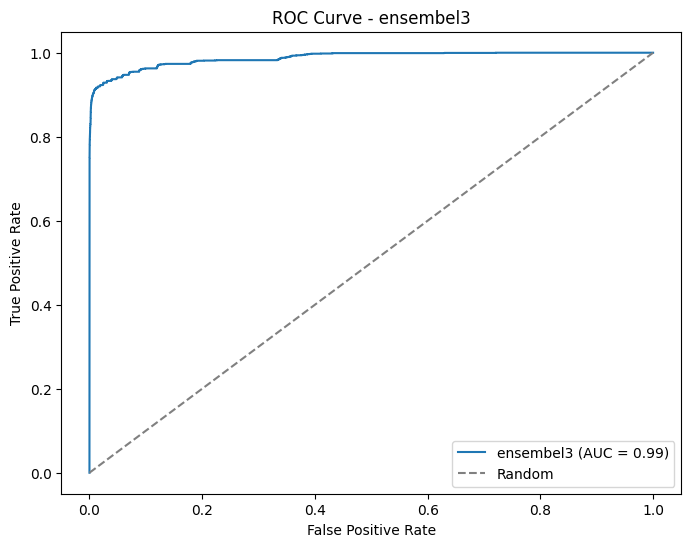

In [76]:
evaluate_model(ensemble_classifier3, X_test2, y_test2, 'ensembel3')

In [77]:
balanced_random_forest_classifier = BalancedRandomForestClassifier(random_state=42)
extra_trees_classifier = ExtraTreesClassifier(random_state=42)

In [78]:
ensemble_classifier4 = VotingClassifier(
    estimators=[
        ('random_forest', random_forest_classifier),
        ('xgboost', xgboost_classifier),
        ('balanced_random_forest', balanced_random_forest_classifier),
        ('extra_trees', extra_trees_classifier)
    ],
    voting='soft'  # Use 'soft' for probability voting
)

In [79]:
# Train the ensemble model
ensemble_classifier4.fit(X_train2, y_train2)

/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning:

The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.

/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning:

The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.



VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('balanced_random_forest',
                              BalancedRandomForestClassifier(random_state=42)),
                             ('extra_trees',
                              ExtraTreesClassifier(random_state=42))],
                 voting='soft')

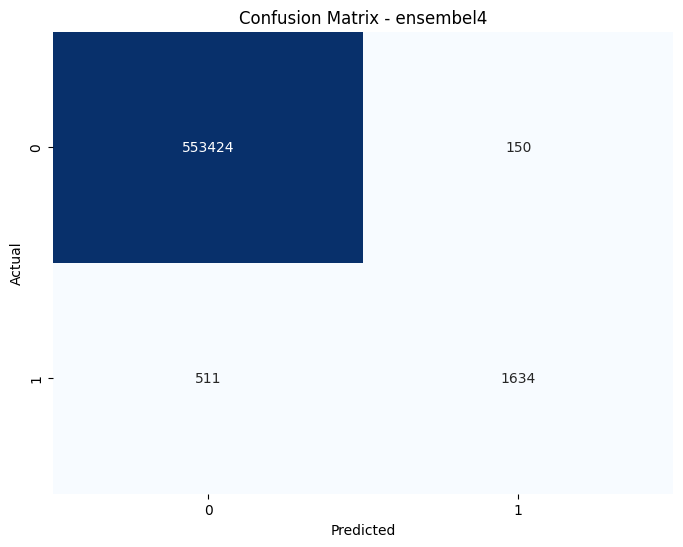

Classification Report - ensembel4:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.92      0.76      0.83      2145

    accuracy                           1.00    555719
   macro avg       0.96      0.88      0.92    555719
weighted avg       1.00      1.00      1.00    555719



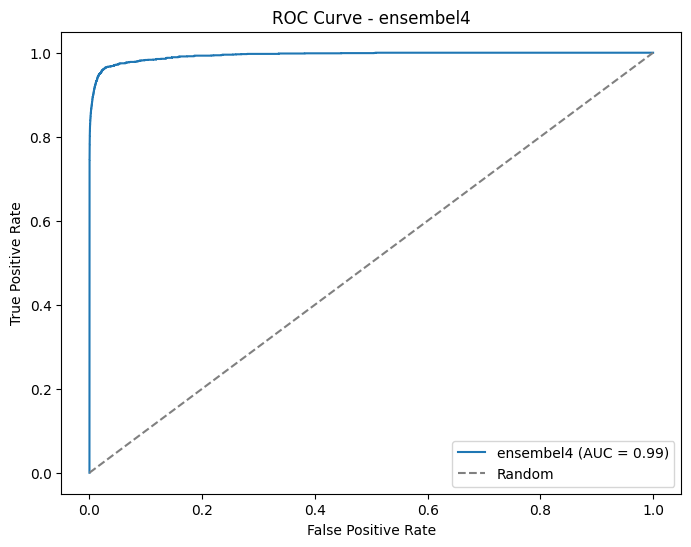

In [80]:
evaluate_model(ensemble_classifier4, X_test2, y_test2, 'ensembel4')

In [87]:
# Define different classifiers
random_forest_classifier = RandomForestClassifier(class_weight=class_weights, random_state=42)
xgboost_classifier = XGBClassifier(scale_pos_weight=class_weights[1], random_state=42)
balanced_random_forest_classifier = BalancedRandomForestClassifier(random_state=42, class_weight=class_weights)
decision_tree_classifier = DecisionTreeClassifier(class_weight=class_weights, random_state=42)
logistic_classifier = LogisticRegression(class_weight=class_weights, random_state=42)

In [88]:
# Create an ensemble of different models using VotingClassifier
ensemble_classifier5 = VotingClassifier(
    estimators=[
        ('random_forest', random_forest_classifier),
        ('xgboost', xgboost_classifier),
        ('balanced_random_forest', balanced_random_forest_classifier),
        ('decision_tree', decision_tree_classifier),
        ('logistic', logistic_classifier)
    ],
    voting='soft'  # Use 'soft' for probability voting
)

In [89]:
# Train the ensemble model
ensemble_classifier5.fit(X_train2, y_train2)

/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning:

The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.

/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning:

The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.



VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(class_weight={0: 0.5029111776656126,
                                                                   1: 86.37589928057554},
                                                     random_state=42)),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_me...
                             ('balanced_random_forest',
                              BalancedRandomForestClassifier(class_weight={0: 0.5029111776656126,
                                                                           1: 86.37589928057554},
                                                             random_state=42)),
                             ('decision_tree',
                              DecisionTreeClassifier(class_weight={0: 0.5029111776656126,
                                                                   1: 86.37589928057554},
                                                     random_state=42)),
                             ('logistic',
                              LogisticRegression(class_weight={0: 0.5029111776656126,
                                                               1: 86.37589928057554},
                                                 random_state=42))],
                 voting='soft')

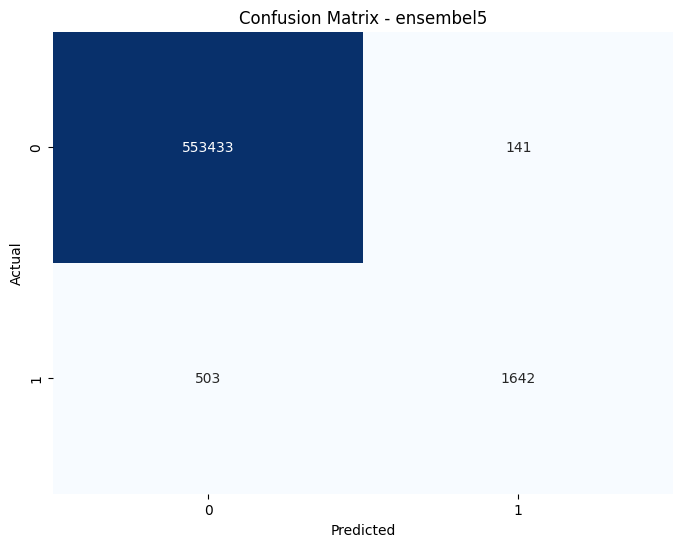

Classification Report - ensembel5:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.92      0.77      0.84      2145

    accuracy                           1.00    555719
   macro avg       0.96      0.88      0.92    555719
weighted avg       1.00      1.00      1.00    555719



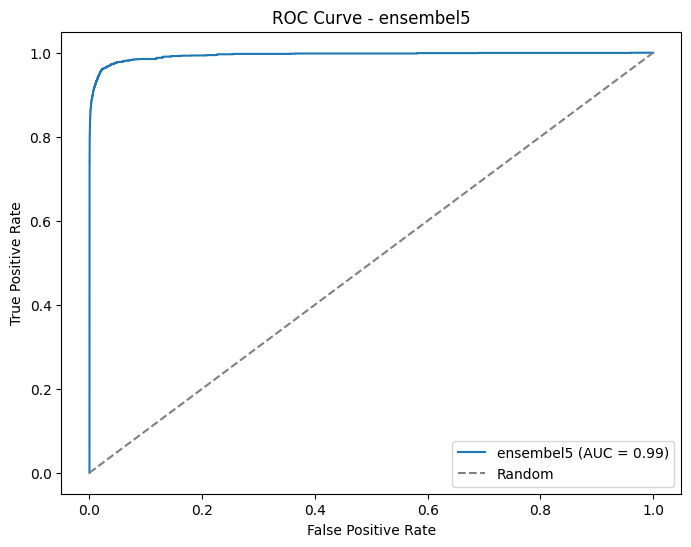

In [90]:
evaluate_model(ensemble_classifier5, X_test2, y_test2, 'ensembel5')

In [91]:
# Make predictions on the test data
ens2_predictions =  ensemble_classifier5.predict(X_test2)
# Create submission DataFrames
ens2_submission = pd.DataFrame({'ID': unnamed_column + 1, 'is_fraud': ens2_predictions})
# Save the submissions to CSV files
ens2_submission.to_csv('ens2_submission.csv', index=False)